In [1]:
'Physical Constants'
import scipy.constants as sc
import numpy as np
h = sc.physical_constants['Planck constant'][0]
hbar = h/2/np.pi
e = sc.physical_constants['elementary charge'][0]
m_e = sc.physical_constants['electron mass'][0]
mu_B = sc.physical_constants['Bohr magneton'][0]
k_B = sc.physical_constants['Boltzmann constant'][0]
epsilon_0 = sc.physical_constants['electric constant'][0]

# Shubnikov–de Haas (SdH) Oscillations

In [9]:
'Import Data'
import sys
sys.path.append(r'Python_scripts')
import Data_Reader
import os
os.getcwd()
file_path = r"Data\23_MAP_BvsBG_C9_C10_TG11p5V"
data = Data_Reader.data_reader(file_path)
data = data.sort_values(by=['B', 'V_BG']).reset_index(drop=True)
data

,V_BG,B,V_TG,V_SD,I_SD,I_leak,R_AB
0,-6.00,0.0,11.5,-0.001,1.317767e-07,-2.258130e-11,18823.927
1,-5.95,0.0,11.5,-0.001,1.433289e-07,-2.237220e-11,18823.493
2,-5.90,0.0,11.5,-0.001,1.545177e-07,-2.162980e-11,18824.252
3,-5.85,0.0,11.5,-0.001,1.652220e-07,-2.124300e-11,18824.902
4,-5.80,0.0,11.5,-0.001,1.756399e-07,-2.078290e-11,18824.143
...,...,...,...,...,...,...,...
35386,6.30,7.0,11.5,-0.001,8.592480e-07,7.375100e-12,21070.701
35387,6.35,7.0,11.5,-0.001,8.603162e-07,7.657400e-12,21072.001
35388,6.40,7.0,11.5,-0.001,8.616377e-07,8.054700e-12,21070.268
35389,6.45,7.0,11.5,-0.001,8.632235e-07,8.933100e-12,21070.701


C:\Users\TINGYU\AppData\Local\Temp/ipykernel_8108/3832514103.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p1 = ax1.pcolormesh(X, Y, Z*1e3, cmap='inferno', vmin=0, vmax=1.05)
C:\Users\TINGYU\AppData\Local\Temp/ipykernel_8108/3832514103.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p2 = ax2.pcolormesh(X, Y, dZ_B*1e3, cmap='seismic')
C:\Users\TINGYU\AppData\Local\Temp/ipykernel_8108/3832514103.py:37: MatplotlibDeprecationWarning: shading='flat' w

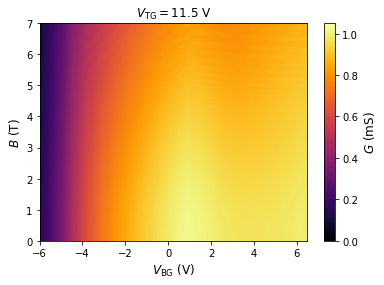

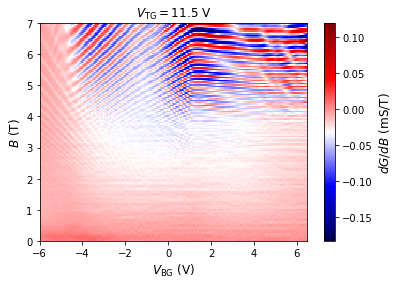

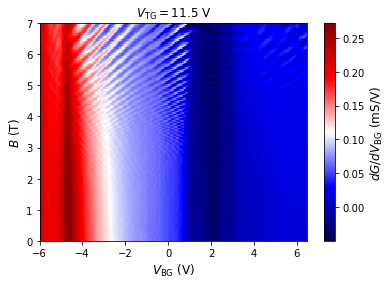

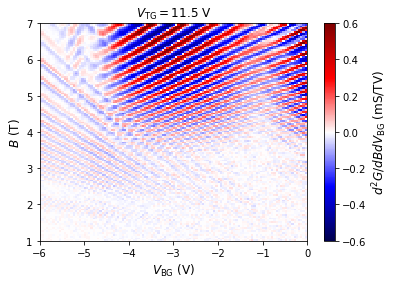

In [3]:
'Two-Dimensional Map'
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Vtg = np.unique(data['V_TG'].values)
Vbg = data['V_BG'].values
G = -(data['I_SD']/data['V_SD']).values
B = data['B'].values
M = len(np.unique(B)) # Finding unique elements in a numpy array
N = len(np.unique(Vbg))
X = Vbg.reshape(M,N)
Y = B.reshape(M,N)
Z = G.reshape(M,N)
dZ_B, dZ_BG = np.gradient(Z, Y[:, 0], X[0, :])
dZ_B2, dZ_BGB = np.gradient(dZ_B, Y[:, 0], X[0, :])
#----------------------------------------------------------
fig1, ax1 = plt.subplots()
ax1.set_title(r'$V_\mathrm{TG}=%.1f~\mathrm{V}$' %Vtg)
ax1.set_xlabel(r'$V_\mathrm{BG}\ (\mathrm{V})$',fontsize=12)
ax1.set_ylabel(r'$B\ (\mathrm{T})$',fontsize=12)
p1 = ax1.pcolormesh(X, Y, Z*1e3, cmap='inferno', vmin=0, vmax=1.05) 
cbar = plt.colorbar(p1)
cbar.set_label(r'$G\ (\mathrm{mS})$',fontsize=12)
#----------------------------------------------------------
fig2, ax2 = plt.subplots()
ax2.set_title(r'$V_\mathrm{TG}=%.1f~\mathrm{V}$' %Vtg)
ax2.set_xlabel(r'$V_\mathrm{BG}\ (\mathrm{V})$',fontsize=12)
ax2.set_ylabel(r'$B\ (\mathrm{T})$',fontsize=12)
p2 = ax2.pcolormesh(X, Y, dZ_B*1e3, cmap='seismic')
cbar = plt.colorbar(p2)
cbar.set_label(r'$dG/dB\ (\mathrm{mS/T})$',fontsize=12)
#----------------------------------------------------------
fig3, ax3 = plt.subplots()
ax3.set_title(r'$V_\mathrm{TG}=%.1f~\mathrm{V}$' %Vtg)
ax3.set_xlabel(r'$V_\mathrm{BG}\ (\mathrm{V})$',fontsize=12)
ax3.set_ylabel(r'$B\ (\mathrm{T})$',fontsize=12)
p3 = ax3.pcolormesh(X, Y, dZ_BG*1e3, cmap='seismic')
cbar = plt.colorbar(p3)
cbar.set_label(r'$dG/dV_\mathrm{BG}\ (\mathrm{mS/V})$',fontsize=12)
#----------------------------------------------------------
fig4, ax4 = plt.subplots()
ax4.set_title(r'$V_\mathrm{TG}=%.1f~\mathrm{V}$' %Vtg)
ax4.set_xlabel(r'$V_\mathrm{BG}\ (\mathrm{V})$',fontsize=12)
ax4.set_ylabel(r'$B\ (\mathrm{T})$',fontsize=12)
ax4.set_xlim(-6, 0)
ax4.set_ylim(1, 7)
p3 = ax4.pcolormesh(X, Y, dZ_BGB*1e3, cmap='seismic', vmin=-0.6, vmax=0.6 )
cbar = plt.colorbar(p3)
cbar.set_label(r'$d^2G/dBdV_\mathrm{BG}\ (\mathrm{mS/TV})$',fontsize=12)

C:\Users\TINGYU\AppData\Local\Temp/ipykernel_8108/3478625214.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p1 = ax1.pcolormesh(Y_fft, X_fft, Z_fft/Z_fft[:, 100:].max(), cmap='inferno',  vmin=0, vmax=1)
C:\Users\TINGYU\AppData\Local\Temp/ipykernel_8108/3478625214.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p2 = ax2.pcolormesh(Y_fft, X_fft, (Z_fft_B/Z_fft_B[:, 100:].max()), cmap='inferno', vmin=0, vmax=1)
C:\Users\TINGYU\AppData\Local\Temp/ipyk

(0.0, 200.0)

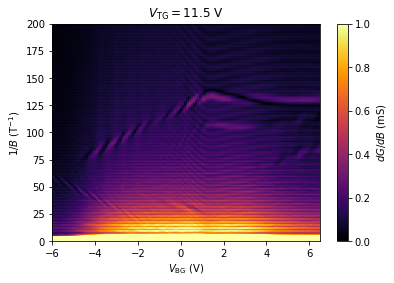

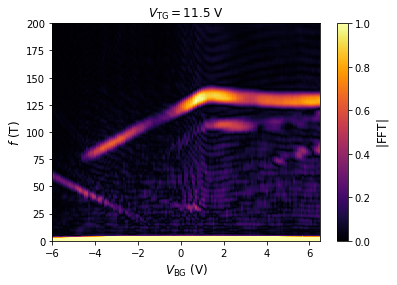

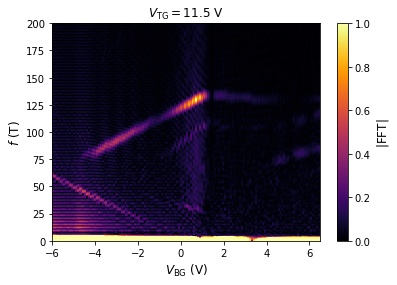

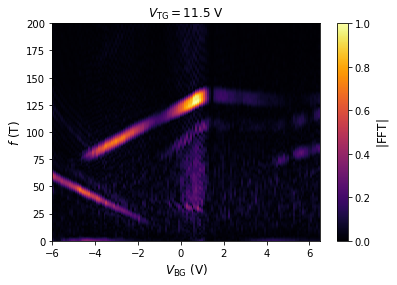

In [4]:
import scipy.interpolate as interpolate
from FFT_masmiche import FFT, FFT_
'FURIER TRANSFORM'
'Spline'
Z0 = np.tile(Z[0, :], (len(Z[:, 0]), 1) )
f1 = interpolate.interp2d(X[0, :], Y[:,0], (Z-Z0), kind='linear')
f2 = interpolate.interp2d(X[0, :], Y[:,0], dZ_B, kind='linear')
f3 = interpolate.interp2d(X[0, :], Y[:,0], dZ_BG, kind='linear')
f4 = interpolate.interp2d(X[0, :], Y[:,0], dZ_BGB, kind='linear')

xnew = np.linspace(X.min(), X.max(), len(X[:,0]))
ynew = np.linspace(1/7, 1/2, len(Y)*3)
Xnew = np.tile(xnew, (len(ynew), 1))
Ynew = np.tile(ynew, (len(xnew),1)).T
Znew = f1(xnew, 1/ynew)
dZnew_B = np.flip(f2(xnew, 1/ynew), 0)
dZnew_BG = np.flip(f3(xnew, 1/ynew), 0)
dZnew_BGB = np.flip(f4(xnew, 1/ynew), 0)

X_fft, Y_fft, Z_fft = FFT_(Ynew.T, Xnew[0, :], Znew.T)
X_fft, Y_fft, Z_fft_B = FFT_(Ynew.T, Xnew[0, :], dZnew_B.T)
X_fft, Y_fft, Z_fft_BG = FFT_(Ynew.T, Xnew[0, :], dZnew_BG.T)
X_fft, Y_fft, Z_fft_BGB = FFT_(Ynew.T, Xnew[0, :], dZnew_BGB.T)

#-------------------------------------------------------------
fig1, ax1 = plt.subplots()
ax1.set_title(r'$V_\mathrm{TG}=%.1f~\mathrm{V}$' %Vtg)
ax1.set_xlabel(r'$V_\mathrm{BG}\ (\mathrm{V})$')
ax1.set_ylabel(r'$1/B\ (\mathrm{T^{-1}})$')
p1 = ax1.pcolormesh(Y_fft, X_fft, Z_fft/Z_fft[:, 100:].max(), cmap='inferno',  vmin=0, vmax=1)
cbar = plt.colorbar(p1)
cbar.set_label(r'$dG/dB\  (\mathrm{mS})$')
ax1.set_ylim(0, 200)
#-------------------------------------------------------------
fig2, ax2 = plt.subplots()
ax2.set_title(r'$V_\mathrm{TG}=%.1f~\mathrm{V}$' %Vtg)
ax2.set_xlabel(r'$V_\mathrm{BG}\ (\mathrm{V})$',fontsize=12)
ax2.set_ylabel(r'$f\ (\mathrm{T})$',fontsize=12)
p2 = ax2.pcolormesh(Y_fft, X_fft, (Z_fft_B/Z_fft_B[:, 100:].max()), cmap='inferno', vmin=0, vmax=1) 
cbar = plt.colorbar(p2)
cbar.set_label(r'$|\mathrm{FFT}|$',fontsize=12)
ax2.set_ylim(0, 200)
#-------------------------------------------------------------
fig3, ax3 = plt.subplots()
ax3.set_title(r'$V_\mathrm{TG}=%.1f~\mathrm{V}$' %Vtg)
ax3.set_xlabel(r'$V_\mathrm{BG}\ (\mathrm{V})$',fontsize=12)
ax3.set_ylabel(r'$f\ (\mathrm{T})$',fontsize=12)
p3 = ax3.pcolormesh(Y_fft, X_fft, (Z_fft_BG/Z_fft_BG[:, 100:].max()), cmap='inferno', vmin=0, vmax=1) 
cbar = plt.colorbar(p3)
cbar.set_label(r'$|\mathrm{FFT}|$',fontsize=12)
ax3.set_ylim(0, 200)
#-------------------------------------------------------------
fig4, ax4 = plt.subplots()
ax4.set_title(r'$V_\mathrm{TG}=%.1f~\mathrm{V}$' %Vtg)
ax4.set_xlabel(r'$V_\mathrm{BG}\ (\mathrm{V})$',fontsize=12)
ax4.set_ylabel(r'$f\ (\mathrm{T})$',fontsize=12)
p4 = ax4.pcolormesh(Y_fft, X_fft, (Z_fft_BGB/Z_fft_BGB[:, 100:].max()), cmap='inferno', vmin=0, vmax=1) 
cbar = plt.colorbar(p4)
cbar.set_label(r'$|\mathrm{FFT}|$',fontsize=12)
ax4.set_ylim(0, 200)

# Bands in MoS2

In [5]:
'Import Data'
os.getcwd()
file_path = r"Data\22_MAP_TGvsBG_C9_C10_B7T"
data = Data_Reader.data_reader(file_path)
data = data.sort_values(by=['V_TG', 'V_BG']).reset_index(drop=True)

C:\Users\TINGYU\AppData\Local\Temp/ipykernel_8108/4162959490.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p1 = ax1.pcolormesh(X, Y, Z*1e3, cmap='inferno', vmin=0, vmax=1.05)
C:\Users\TINGYU\AppData\Local\Temp/ipykernel_8108/4162959490.py:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p2 = ax2.pcolormesh(X, Y, dZ_TG*1e3, cmap='seismic')
C:\Users\TINGYU\AppData\Local\Temp/ipykernel_8108/4162959490.py:35: MatplotlibDeprecationWarning: shading='flat' 

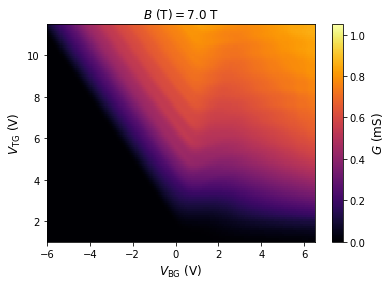

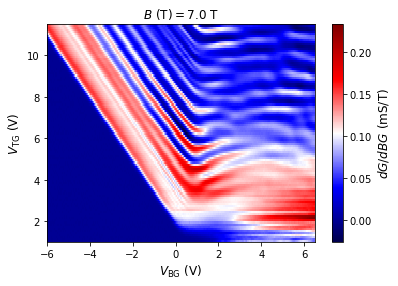

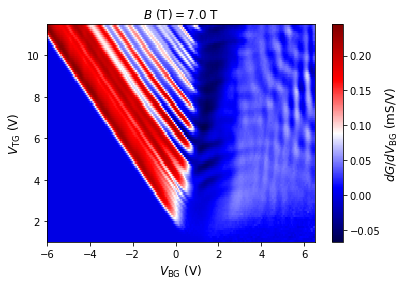

In [6]:
'Two-dimensional map'
B = np.unique(data['B'].values)
Vbg = data['V_BG'].values
G = -(data['I_SD']/data['V_SD']).values
Vtg = data['V_TG'].values

M = len(np.unique(Vtg)) # Finding unique elements in a numpy array
N = len(np.unique(Vbg))
X = Vbg.reshape(M,N)
Y = Vtg.reshape(M,N)
Z = G.reshape(M,N)
dZ_TG, dZ_BG = np.gradient(Z, Y[:, 0], X[0, :])
dZ_TG2, dZ_BGTG = np.gradient(dZ_TG, Y[:, 0], X[0, :])
#----------------------------------------------------------
fig1, ax1 = plt.subplots()
ax1.set_title(r'$B\ (\mathrm{T})=%.1f~\mathrm{T}$' %B)
ax1.set_xlabel(r'$V_\mathrm{BG}\ (\mathrm{V})$',fontsize=12)
ax1.set_ylabel(r'$V_\mathrm{TG}\ (\mathrm{V})$',fontsize=12)
p1 = ax1.pcolormesh(X, Y, Z*1e3, cmap='inferno', vmin=0, vmax=1.05) 
cbar = plt.colorbar(p1)
cbar.set_label(r'$G\ (\mathrm{mS})$',fontsize=12)
#----------------------------------------------------------
fig2, ax2 = plt.subplots()
ax2.set_title(r'$B\ (\mathrm{T})=%.1f~\mathrm{T}$' %B)
ax2.set_xlabel(r'$V_\mathrm{BG}\ (\mathrm{V})$',fontsize=12)
ax2.set_ylabel(r'$V_\mathrm{TG}\ (\mathrm{V})$',fontsize=12)
p2 = ax2.pcolormesh(X, Y, dZ_TG*1e3, cmap='seismic')
cbar = plt.colorbar(p2)
cbar.set_label(r'$dG/dBG\ (\mathrm{mS/T})$',fontsize=12)
#----------------------------------------------------------
fig3, ax3 = plt.subplots()
ax3.set_title(r'$B\ (\mathrm{T})=%.1f~\mathrm{T}$' %B)
ax3.set_xlabel(r'$V_\mathrm{BG}\ (\mathrm{V})$',fontsize=12)
ax3.set_ylabel(r'$V_\mathrm{TG}\ (\mathrm{V})$',fontsize=12)
p3 = ax3.pcolormesh(X, Y, dZ_BG*1e3, cmap='seismic')
cbar = plt.colorbar(p3)
cbar.set_label(r'$dG/dV_\mathrm{BG}\ (\mathrm{mS/V})$',fontsize=12)

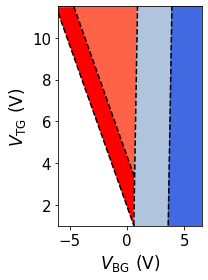

In [7]:
# Cartoon plot of the phase diagram
onset = lambda V: -1.54320904*V+1.9314229
sec_band = lambda V: -1.54323284*V+4.33446745
sec_layer = lambda V: 32.54181818*V-18.19781818
v = np.linspace(-6, 6.5, 1000)
def minimal_value1(v): # find minimal value between onset and sec_layer lines
    value = np.zeros(len(v))
    for i in range(len(v)):
        value[i] = max([onset(v)[i], sec_layer(v)[i]])
    return value
def minimal_value2(v): # find minimal value between sec_band and sec_layer lines
    value = np.zeros(len(v))
    for i in range(len(v)):
        value[i] = max([sec_band(v)[i], sec_layer(v)[i]])
    return value

fig = plt.figure(figsize=(3,4))
plt.xlabel(r'$V_\mathrm{BG}\ (\mathrm{V})$',fontsize=17)
plt.ylabel(r'$V_\mathrm{TG}\ (\mathrm{V})$',fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(v, onset(v), '--k')
plt.plot(v[minimal_value1(v)<sec_band(v)],
sec_band(v[minimal_value1(v)<sec_band(v)]), '--k')
plt.plot(v, sec_layer(v), '--k')
plt.plot(v+3, sec_layer(v), '--k')
plt.xlim(-6, 6.5)
plt.ylim(1, 11.5)
plt.yticks(np.arange(2, 12, 2))

plt.fill_between(v, y1=0, y2=onset(v), color='w')
plt.fill_between(v[minimal_value1(v)<sec_band(v)],
y1=minimal_value1(v[minimal_value1(v)<sec_band(v)]),
y2=sec_band(v[minimal_value1(v)<sec_band(v)]),
                 color='red')
plt.fill_between(v[sec_layer(v)<11.5],
y1=minimal_value2(v[sec_layer(v)<11.5]), y2=11.5,
                 color='tomato')
plt.fill_between(v, y1=sec_layer(v-3), y2=sec_layer(v),
                 color='lightsteelblue')
plt.fill_between(v, y1=0, y2=sec_layer(v-3),
                 color='royalblue')

plt.tight_layout()
# plt.savefig("High Resoltion.png",dpi=600)
# plt.show()

# Two-Channel Model of Conductivity/Resistivity

Text(0, 0.5, '$\\rho_{xy}\\ [\\mathrm{\\Omega}]$')

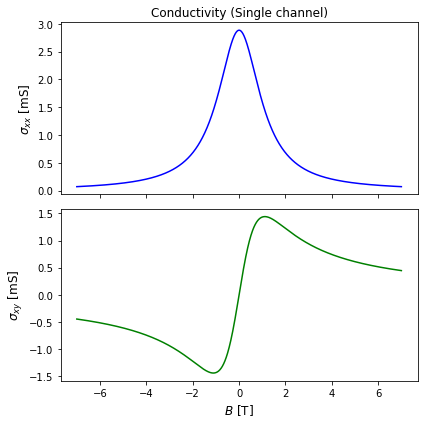

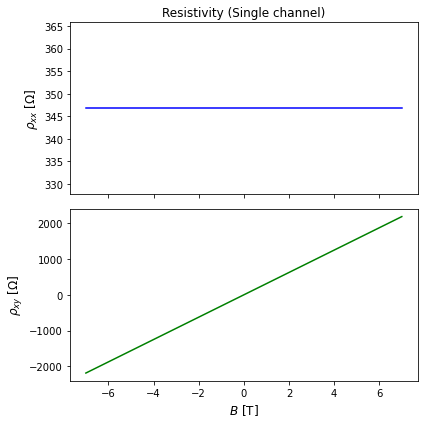

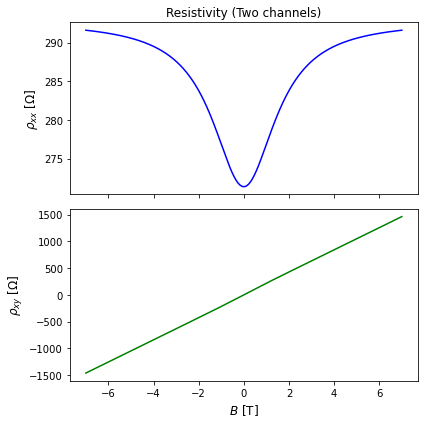

In [8]:
def sigma_xx(B, mu, n):
    return e*n*mu / (1+(mu*B)**2)
def sigma_xy(B, mu, n):
    return e*n*mu**2*B / (1+(mu*B)**2)

def rho_xx(B, mu, n):
    A = sigma_xx(B, mu, n)**2 + sigma_xy(B, mu, n)**2
    B = sigma_xx(B, mu, n)
    return B / A
def rho_xy(B, mu, n):
    A = sigma_xx(B, mu, n)**2 + sigma_xy(B, mu, n)**2
    B = sigma_xy(B, mu, n)
    return B / A

def rho_xx2(B, mu1, n1, mu2, n2):
    A = (sigma_xx(B, mu1, n1)+sigma_xx(B, mu2, n2))**2 + (sigma_xy(B, mu1, n1)+sigma_xy(B, mu2, n2))**2
    B = sigma_xx(B, mu1, n1)+sigma_xx(B, mu2, n2)
    return B / A
def rho_xy2(B, mu1, n1, mu2, n2):
    A = (sigma_xx(B, mu1, n1)+sigma_xx(B, mu2, n2))**2 + (sigma_xy(B, mu1, n1)+sigma_xy(B, mu2, n2))**2
    B = sigma_xy(B, mu1, n1)+sigma_xy(B, mu2, n2)
    return B / A

b = np.linspace(-7, 7, 1000)

fig, (ax1,ax2) = plt.subplots(ncols=1, nrows=2, figsize=(6,6), sharex=True, tight_layout=True)
ax1.set_title(r'Conductivity (Single channel)')
ax1.plot(b, sigma_xx(b, mu=0.9, n=2e16)*1e3, 'b-')
ax1.set_ylabel(r'$\sigma_{xx}\ [\mathrm{mS}]$',fontsize=12)
ax2.plot(b, sigma_xy(b, mu=0.9, n=2e16)*1e3, 'g-')
ax2.set_xlabel(r'$B\ [\mathrm{T}]$',fontsize=12)
ax2.set_ylabel(r'$\sigma_{xy}\ [\mathrm{mS}]$',fontsize=12)

fig, (ax1,ax2) = plt.subplots(ncols=1, figsize=(6,6), nrows=2, sharex=True, tight_layout=True)
ax1.set_title(r'Resistivity (Single channel)')
ax1.plot(b, rho_xx(b, mu=0.9, n=2e16), 'b-')
ax1.set_ylabel(r'$\rho_{xx}\ [\mathrm{\Omega}]$',fontsize=12)
ax2.plot(b, rho_xy(b, mu=0.9, n=2e16), 'g-')
ax2.set_xlabel(r'$B\ [\mathrm{T}]$',fontsize=12)
ax2.set_ylabel(r'$\rho_{xy}\ [\mathrm{\Omega}]$',fontsize=12)

fig, (ax1,ax2) = plt.subplots(ncols=1, nrows=2, figsize=(6,6), sharex=True, tight_layout=True)
ax1.set_title(r'Resistivity (Two channels)')
ax1.plot(b, rho_xx2(b, mu1=0.9, n1=2e16, mu2=0.5, n2=1e16), 'b-')
ax1.set_ylabel(r'$\rho_{xx}\ [\mathrm{\Omega}]$',fontsize=12)
ax2.plot(b, rho_xy2(b, mu1=0.9, n1=2e16, mu2=0.5, n2=1e16), 'g-')
ax2.set_xlabel(r'$B\ [\mathrm{T}]$',fontsize=12)
ax2.set_ylabel(r'$\rho_{xy}\ [\mathrm{\Omega}]$',fontsize=12)

# Carrier Density Dependence of MR

In [11]:
'Import Data'
os.getcwd()
file_path = r"Data\62_AC_SweepB_stepBG_TG11p5V_10V_highRes"
data = Data_Reader.data_reader(file_path)
data = data.sort_values(by=['V_TG','V_BG']).reset_index(drop=True)
'TG = 11.5 V'
data_11p5V = data[data['V_TG'].values == 11.5]

In [12]:
# Experimental Parameters
L = 3e-6
W = 8.5e-6

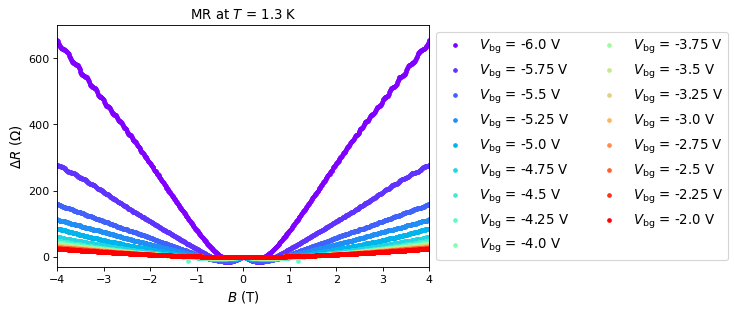

In [13]:
# Plot Delta_Sigma as BG
import matplotlib.cm as cm

BG_arr = np.linspace(-6,-2,17)
colors = cm.rainbow(np.linspace(0,1,len(BG_arr)))

plt.figure(figsize=(6,4), dpi=80)
for BG in BG_arr:
    data_BG = data_11p5V[data_11p5V['V_BG'].values == BG]
    Rxx_B = (data_BG[data_BG['B']!=0]['V1_AC'])/(data_BG[data_BG['B']!=0]['I_SD_AC'])
    Rxx_B_norm = (Rxx_B.values+Rxx_B.values[::-1])/2-Rxx_B.tolist()[len(Rxx_B)//2]
    plt.scatter(data_BG['B'], Rxx_B_norm, s=10, color=colors[np.where(BG_arr==BG)[0][0]], label = r'$V_\mathrm{bg}$'+" = "+str(BG)+" V")
    plt.xlim(-4,4)
    plt.ylim(-30,700)
    plt.yticks(np.arange(0,701,200))
    plt.xlabel(r'$B\ (\mathrm{T})$', fontsize=12)
    plt.ylabel('\u0394'+r'$R_\mathrm{}\ $'+'(\u03A9)', fontsize=12)
    plt.title("MR at "+r'$T\ $'+"= 1.3 K")
    plt.legend(fontsize=12, ncol=2, loc='center left', bbox_to_anchor=(1,0.5))

# Subtract the Positive Magnetoresistance Background

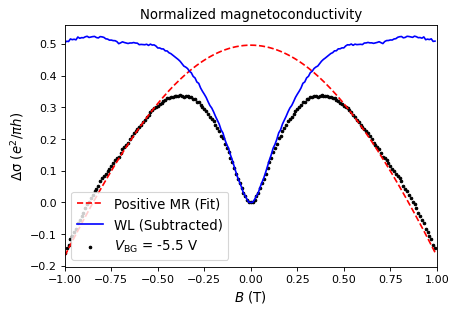

In [14]:
# Fit the Background with Quadratic Function

def para_func(df, parameter):
    global Rxx_B, sigma_B
    data_para = df[df['V_BG'].values == parameter]
    Rxx_B = (data_para[data_para['B']!=0]['V1_AC'])/(data_para[data_para['B']!=0]['I_SD_AC'])
    Rxy_B = (data_para[data_para['B']!=0]['V2_AC'])/(data_para[data_para['B']!=0]['I_SD_AC'])
    Rouxx_B = Rxx_B*W/L
    Rouxy_B = Rxy_B
    sigma_B = Rouxx_B/(Rouxx_B**2+Rouxy_B**2)
    sigma_B_norm = (sigma_B.values+sigma_B.values[::-1])/2-sigma_B.tolist()[len(sigma_B)//2]
    delta_sigma_B_norm = [element/(e**2/(np.pi*h)) for element in sigma_B_norm]
    return data_para['B'].tolist(), delta_sigma_B_norm

# Replace the outliers in a list
def rep_outlier_func(data):
    arr = np.array(np.diff(data))
    idx = np.where(abs(arr) > 0.5)[0].tolist()
    for idx_ in idx:
        data[idx_] = np.mean(data[idx_-2]+data[idx_+2])
        
# Find local maximum
def coverage_loc_func(list_val, num_filter):
    return [list_val.index(num) for num in sorted(list_val, reverse=True)][:num_filter][num_filter-1]

BG = -5.5
num_filter = 2
B, delta_sigma_B_norm = para_func(data_11p5V, BG)
rep_outlier_func(delta_sigma_B_norm)
B_peak = coverage_loc_func(delta_sigma_B_norm, num_filter)
fit_exp = delta_sigma_B_norm[0:B_peak]+delta_sigma_B_norm[800-B_peak:800]
result = np.poly1d(np.polyfit(B[0:B_peak]+B[800-B_peak:800], fit_exp, 10))
WL_sub = delta_sigma_B_norm-result(B)
WL_sub_norm = (WL_sub-WL_sub[400])[300:500]

plt.figure(figsize=(6,4), dpi=80)
plt.scatter(B[300:500], delta_sigma_B_norm[300:500], s=5, label=r'$V_\mathrm{BG}$ = '+str(BG)+' V', color="black")
plt.plot(B[300:500], result(B)[300:500], "r--", label='Positive MR (Fit)')
plt.plot(B[300:500], WL_sub_norm, color="blue", label="WL (Subtracted)")

plt.xlabel(r'$B\ (\mathrm{T})$', fontsize=12)
plt.ylabel('\u03C3 ($e^2/\u03C0h$)', fontsize=12)
plt.xlabel(r'$B\ (\mathrm{T})$', fontsize=12)
plt.ylabel('\u0394\u03C3 ($e^2/\u03C0h$)', fontsize=12)
plt.xlim(-1,1)
plt.title("Normalized magnetoconductivity")
plt.legend(fontsize=12, loc='lower left')
plt.show()

# Mean Free Path

In [15]:
# Parallel capacitance model
def cap_func(BG_arr):
    global C_TG, C_BG
    d_t = 19.5e-9
    d_b = 13e-9
    epsilon = 3.3
    TG = 11.5
    C_TG = epsilon_0*epsilon/d_t
    C_BG = epsilon_0*epsilon/d_b
    ns_arr = (C_TG*TG+C_BG*BG_arr)/e/1e4
    return ns_arr

# Mean free path (Zero-field conductivity in 2D)
def e_len_classic(sigma_B_0_arr, ns_arr):
    return np.divide(sigma_B_0_arr, e**2/hbar*np.sqrt(ns_arr/(2*np.pi)))*1e7

# Mean free path (Peak of weak localization)
def e_len_WL(B_peak):
    return np.sqrt(hbar/(2*e)/B_peak)*1e9

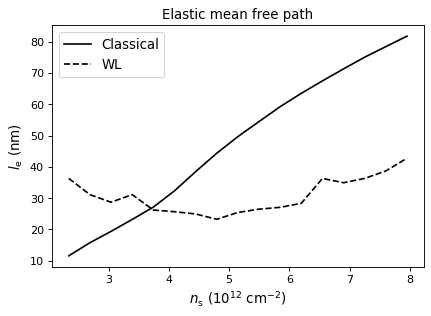

In [16]:
# BG-dependent carrier density
ns_arr = cap_func(BG_arr)

# Mean free path from the classical theory
sigma_B_0_arr = np.array([])
for BG in BG_arr:
    para_func(data_11p5V, BG)
    sigma_B_0 = sigma_B.tolist()[len(sigma_B.tolist())//2]
    sigma_B_0_arr = np.append(sigma_B_0_arr, sigma_B_0)
e_len_classic_arr = e_len_classic(sigma_B_0_arr, ns_arr)

# Mean free path from the weak localization
e_len_WL_arr = np.array([])
num_filter = 5
for BG in BG_arr:
    B, delta_sigma_B_norm = para_func(data_11p5V, BG)
    B_peak = abs(B[coverage_loc_func(delta_sigma_B_norm, num_filter)])
    e_len_WL_arr = np.append(e_len_WL_arr, e_len_WL(B_peak))
    
# Plot mean free paths
figure(figsize=(6,4), dpi=80)
plt.plot(ns_arr/(1e12), e_len_classic_arr, color="black", label="Classical")
plt.plot(ns_arr/(1e12), e_len_WL_arr, "k--", label="WL")
plt.xlabel(r'$n_\mathrm{s}\ (\mathrm{10^{12}\ cm^{-2}})$', fontsize=12)
plt.ylabel(r'$l_\mathrm{e}\ (\mathrm{nm})$', fontsize=12)
plt.title("Elastic mean free path")
plt.legend(fontsize=12)
plt.show()

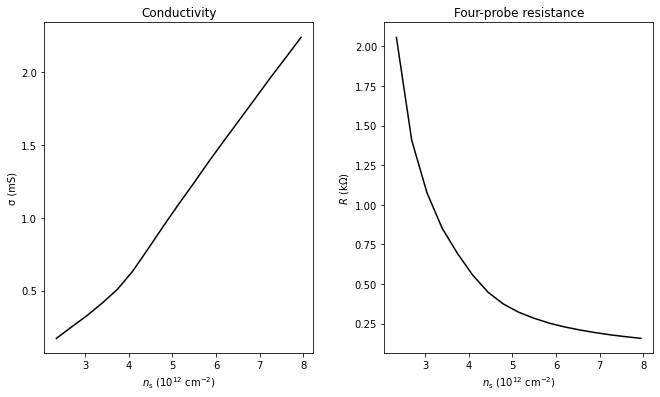

In [17]:
# Plot conductivity VS. carrier density
# BG-dependent four-probe resistance
Rxx_B_arr = np.array([])
for BG in BG_arr:
    para_func(data_11p5V, BG)
    Rxx_B_0 = Rxx_B.tolist()[len(Rxx_B.tolist())//2]
    Rxx_B_arr = np.append(Rxx_B_arr, Rxx_B_0)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.tight_layout(pad=4.0)
ax1.plot(ns_arr/(1e12), sigma_B_0_arr*1e3, color="black")
ax1.set(xlabel=r'$n_\mathrm{s}\ (\mathrm{10^{12}\ cm^{-2}})$', ylabel='\u03C3 (mS)', title="Conductivity")
ax2.plot(ns_arr/(1e12), Rxx_B_arr/1e3, color="black")
ax2.set(xlabel=r'$n_\mathrm{s}\ (\mathrm{10^{12}\ cm^{-2}})$', ylabel=r'$R_\mathrm{}\ $' + '(k\u03A9)', title="Four-probe resistance")
plt.rcParams.update({'font.size': 12})

# Hikami-Larkin-Nagaoka Model

In [18]:
from lmfit import Model
from scipy.special import psi

# Define F function
def F(z):
    return psi(1/2+z)-np.log(z)

# Define the degeneracy
g = 2

# General HLN model
def HLN(B, alpha, tau_phi, tau_so, tau_e, OFFSET):
    D = 1/2*(hbar/0.6/m_e)**2*(4*np.pi*ns)/g*tau_e
    B_phi = hbar/(4*e*D*tau_phi)
    B_so = hbar/(4*e*D*tau_so)
    B_e = hbar/(2*e*D*tau_e)
    return alpha*e**2/(2*np.pi*h)*(-F(B_phi/B))+alpha*e**2/(np.pi*h)*(-F((B_so+B_e)/B))+3*alpha*e**2/(2*np.pi*h)*F((4/3*B_so+B_phi)/B)/(e**2/(np.pi*h))+OFFSET

# Phase coherence & spin-orbit coupling
def HLN_SO(B, alpha, tau_phi, tau_so, tau_e, OFFSET):
    D = 1/2*(hbar/0.6/m_e)**2*(4*np.pi*ns)/g*tau_e
    B_phi = hbar/(4*e*D*tau_phi)
    B_so = hbar/(4*e*D*tau_so)
    return alpha*e**2/(2*np.pi**2*hbar)*(F((B_phi+B_so)/B)+1/2*F((B_phi+2*B_so)/B)-1/2*F(B_phi/B))/(e**2/(np.pi*h))+OFFSET

# Phase coherence & mean free path
def HLN_e(B, alpha, tau_phi, tau_e, OFFSET):
    # ns = (C_TG*TG+C_BG*BG)/e
    D = 1/2*(hbar/0.6/m_e)**2*(4*np.pi*ns)/g*tau_e
    tau_B = hbar/(2*e*D*B)
    return alpha*e**2/(2*np.pi**2*hbar)*(psi(1/2+tau_B/(2*tau_phi))-psi(1/2+tau_B/(2*tau_e))+np.log(tau_phi/tau_e))/(e**2/(np.pi*h))+OFFSET

# Phase coherence & mean free path (Taylor expansion)
def HLN_B0(B, alpha, tau_phi, tau_e, OFFSET):
    D = 1/2*(hbar/0.6/m_e)**2*(4*np.pi*ns)/g*tau_e
    return alpha*2/3*(e*D/hbar)**2*B**2*(tau_phi**2-tau_e**2)

# Model Based On The Literature
Ochoa, H., Finocchiaro, F., Guinea, F., & Fal'Ko, V. I. (2014).
Spin-valley relaxation and quantum transport regimes in two-dimensional transition-metal dichalcogenides.
Physical Review B, 90(23), 235429.

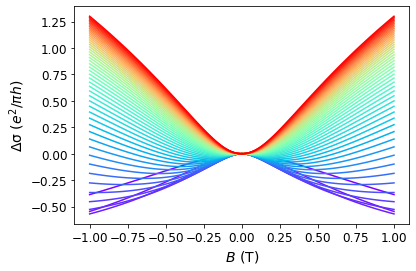

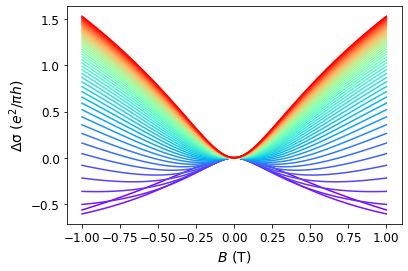

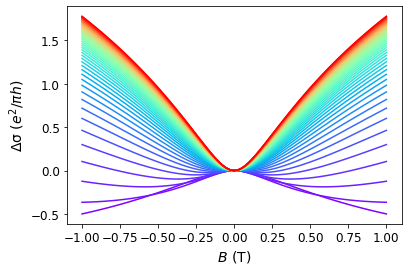

In [19]:
# Regime A (SO splitting > Fermi level)

def HLN_A(B, B_0, tau_e, tau_is, tau_gauge, tau_phi):
    delta_sigma_B = 0
    tau_reciprocal = 1/tau_e+1/tau_is+1/tau_gauge
    tau = 1/tau_reciprocal
    D = 1/2*(hbar/0.6/m_e)**2*(4*np.pi*ns)/g*tau
    miu = sigma_B_0/(ns*e)
    p_F = hbar*np.sqrt(4*np.pi*ns/g)
    tau_star_reciprocal = 2/tau_gauge+15*miu**2*p_F**6*tau/(4*hbar**2)
    tau_star = 1/tau_star_reciprocal
    B_star = hbar/(4*e*D*tau_star)

    for s in range(4):
        if s == 0:
            Lambda = 0
            c_s = -1
        elif s == 1 or 2:
            Lambda = tau_star_reciprocal+1/tau_is
            c_s = 1
        else:
            Lambda = 2/tau_is
            c_s = 1
        B_s = hbar*Lambda/(4*e*D)
        B_phi = hbar/e/(4*D*tau_phi)
        delta_sigma_B += -c_s*(np.log(hbar*tau_reciprocal/(4*e*D*B))-psi(1/2+(B_s+B_phi)/B))
        delta_sigma_B += c_s*(np.log(hbar*tau_reciprocal/(4*e*D*B_0))-psi(1/2+(B_s+B_phi)/B_0))
    return delta_sigma_B

B = np.linspace(1e-10,1,100)
sigma_B_0 = 2.5*(e**2/(np.pi*h))
B_0 = 1e-10
ns = 3.3e16
tau_e = 0.3e-12
tau_phi = 2.15e-12

ratio = np.linspace(1,50,50).tolist()
colors = cm.rainbow(np.linspace(0,1,len(ratio)))
for r_g, r_is in zip(ratio, ratio):
    tau_gauge = r_g*tau_e
    tau_is = r_is*tau_e
    delta_sigma_B = HLN_A(B, B_0, tau_e, tau_is, tau_gauge, tau_phi)
    plt.plot(B, delta_sigma_B, color = colors[ratio.index(r_g)])
    plt.plot(-B, delta_sigma_B, color = colors[ratio.index(r_g)])
    plt.xlabel(r'$B\ (\mathrm{T})$', fontsize=14)
    plt.ylabel('\u0394\u03C3 ($e^2/\u03C0h$)', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=12)
    # plt.legend(fontsize=12, ncol=5, loc='center left', bbox_to_anchor=(1,0.5))
plt.show()
for r_g in ratio:
    tau_gauge = r_g*tau_e
    tau_is = 1e10*tau_e
    delta_sigma_B = HLN_A(B, B_0, tau_e, tau_is, tau_gauge, tau_phi)
    plt.plot(B, delta_sigma_B, color = colors[ratio.index(r_g)])
    plt.plot(-B, delta_sigma_B, color = colors[ratio.index(r_g)])
    plt.xlabel(r'$B\ (\mathrm{T})$', fontsize=14)
    plt.ylabel('\u0394\u03C3 ($e^2/\u03C0h$)', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=12)
    # plt.legend(fontsize=12, ncol=5, loc='center left', bbox_to_anchor=(1,0.5))
plt.show()
for r_is in ratio:
    tau_gauge = 1e10*tau_e
    tau_is = r_is*tau_e
    delta_sigma_B = HLN_A(B, B_0, tau_e, tau_is, tau_gauge, tau_phi)
    plt.plot(B, delta_sigma_B, color = colors[ratio.index(r_is)])
    plt.plot(-B, delta_sigma_B, color = colors[ratio.index(r_is)])
    plt.xlabel(r'$B\ (\mathrm{T})$', fontsize=14)
    plt.ylabel('\u0394\u03C3 ($e^2/\u03C0h$)', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=12)
    # plt.legend(fontsize=12, ncol=5, loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

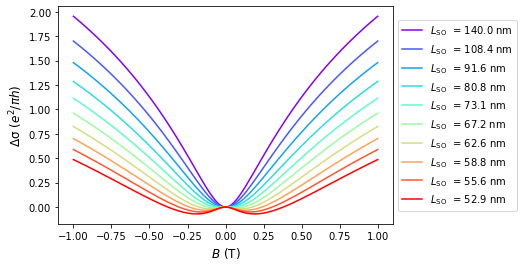

SO Len: 114.27931155993736 nm


In [20]:
# HLN model including the spin-orbit term, phase-coherence term, and elastic-scattering term

def HLN_full_paras(B, B_Phi, B_SO, B_e):
    return (e**2/(np.pi*h)*(np.log(B_Phi/B)-psi(1/2+B_Phi/B))+2*e**2/(np.pi*h)*(np.log((B_SO+B_e)/B)-psi(1/2+(B_SO+B_e)/B)) \
            -3*e**2/(np.pi*h)*(np.log((4/3*B_SO+B_Phi)/B)-psi(1/2+(4/3*B_SO+B_Phi)/B)))/(e**2/(np.pi*h))

B = np.linspace(1e-10,1,100)
B_Phi = 0.05
B_e = 0.84
ratio = np.linspace(0.01,0.07,10).tolist()
colors = cm.rainbow(np.linspace(0,1,len(ratio)))

delta_sigma_Bs = []

for r_SO in ratio:
    B_SO = r_SO*B_e
    delta_sigma_B = HLN_full_paras(B, B_Phi, B_SO, B_e)
    plt.plot(B, delta_sigma_B, color = colors[ratio.index(r_SO)], label=r'$L_\mathrm{SO}\ $'+' = '+str("{:.1f}".format(np.sqrt(hbar/(4*e*r_SO*0.84))*1e9))+" nm")
    plt.plot(-B, delta_sigma_B, color = colors[ratio.index(r_SO)])
    plt.xlabel(r'$B\ (\mathrm{T})$', fontsize=12)
    plt.ylabel('\u0394\u03C3 ($e^2/\u03C0h$)', fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.legend(fontsize=10, ncol=1, loc='center left', bbox_to_anchor=(1,0.5))
    delta_sigma_Bs.append(delta_sigma_B)
plt.show()

print("SO Len: "+(str(np.sqrt(hbar/(4*e*0.015*0.84))*1e9))+" nm")

# Mean Free Path VS. Carrier Density at Constant Displacement Field

In [21]:
# High resolution data at displacement field ~ 0.6, 1, 1.5 V/nm

V_BG_0p6 = np.linspace(-1.4,0.5,191).tolist()
'Import Data'
file_path = r"Data\116_SweepVBG_B0_constD_0p6Vpnm_baseT"
data = Data_Reader.data_reader(file_path)
data_ns_0p6 = data.sort_values(by=['V_BG','B']).reset_index(drop=True)

V_BG_1p0 = np.linspace(-2.7,0.25,296).tolist()
'Import Data'
file_path = r"Data\114_SweepVBG_B0_constD_1Vpnm_baseT"
data = Data_Reader.data_reader(file_path)
data_ns_1p0 = data.sort_values(by=['V_BG','B']).reset_index(drop=True)

V_BG_1p5 = np.linspace(-4.4,-2.1,231).tolist()
'Import Data'
file_path = r"Data\115_SweepVBG_B0_constD_1p5Vpnm_baseT"
data = Data_Reader.data_reader(file_path)
data_ns_1p5 = data.sort_values(by=['V_BG','B']).reset_index(drop=True)

data_ns = [data_ns_0p6, data_ns_1p0, data_ns_1p5]
BGs = [V_BG_0p6, V_BG_1p0, V_BG_1p5]

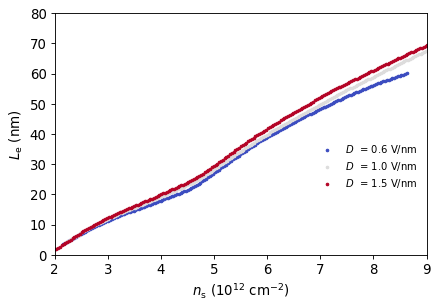

In [22]:
# Mean free path at varied displacement field and fixed carrier density
ns_list = []
e_len_list = []
sigma_B_0_arr = np.array([])

for idx in range(len(data_ns)):
    data_ns_D = data_ns[idx]
    ns_D = data_ns_D['density'].values/1e4
    ns_list.append(ns_D/1e12)
    Rxx_B_0 = (data_ns_D['V1_AC'])/(data_ns_D['I_SD_AC'])
    Rxy_B_0 = (data_ns_D['V2_AC'])/(data_ns_D['I_SD_AC'])
    Rouxx_B_0 = Rxx_B_0*W/L
    Rouxy_B_0 = Rxy_B_0
    sigma_B_0 = Rouxx_B_0/(Rouxx_B_0**2+Rouxy_B_0**2)
    sigma_B_0_arr = np.append(sigma_B_0_arr, sigma_B_0)
    e_len = e_len_classic(np.array(sigma_B_0), ns_D)
    e_len_list.append(e_len)
    
label = ['0.6 V/nm', '1.0 V/nm', '1.5 V/nm']
colors = cm.coolwarm(np.linspace(0,1,len(data_ns)))

figure(figsize=(6,4), dpi=80)
for idx in range(len(e_len_list)):
    plt.scatter(ns_list[idx], e_len_list[idx], color=colors[idx], s=5, label=r'$D_\mathrm{}\ \mathrm{}$'+' = '+str(label[idx]))
    plt.xlabel(r'$n_\mathrm{s}\ (\mathrm{10^{12}\ cm^{-2}})$', fontsize=12)
    plt.ylabel(r'$L_\mathrm{e}\ (\mathrm{nm})$', fontsize=12)
plt.xlim([2,9])
plt.ylim([0,80])
plt.legend(fontsize=9, ncol=1, framealpha=0.0, bbox_to_anchor=(1,0.5))
plt.show()

# Weak Localization at Constant Displacement Field

In [23]:
# High resolution data at displacement field ~ 1 V/nm
'Import Data'
file_path = r"Data\100_WeakLoc_ConstD1Vpernm_baseT_highres"
data = Data_Reader.data_reader(file_path)
data_ns = data.sort_values(by=['V_BG','B']).reset_index(drop=True)

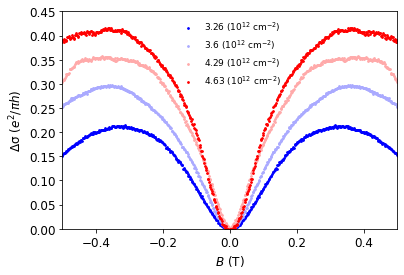

In [24]:
# Visualize the data
BG_arr_ns_ = [-2.4,-2.3,-2.1,-2.0]
colors = cm.bwr(np.linspace(0,1,len(BG_arr_ns_)))

for BG in BG_arr_ns_:
    B, delta_sigma_B_norm = para_func(data_ns, BG)
    data_BG = data_ns[data_ns['V_BG'].values >= BG]
    plt.scatter(B, delta_sigma_B_norm, color=colors[BG_arr_ns_.index(BG)], s=3, label = str(round(data_BG['density'].values[0]/1e16,2))+" $(\mathrm{10^{12}\ cm^{-2}})$")
    plt.xlabel(r'$B\ (\mathrm{T})$', fontsize=12)
    plt.ylabel('\u0394\u03C3 ($e^2/\u03C0h$)', fontsize=12)
    plt.xlim([-0.5,0.5])
    plt.ylim([-0.00,0.45])
    plt.title("")
    plt.legend(fontsize=9, ncol=1, framealpha=0.0)

# WL Model with Coherence Length As Fitting Variable

In [195]:
# Fit the curves only with the coherence length
# Define the fitting function

def range_fit_func(df, BG):
    global B, delta_sigma_B_norm, B_peak, B_range, B_fit
    B, delta_sigma_B_norm = para_func(df, BG)
    rep_outlier_func(delta_sigma_B_norm)
    B = np.sort(B, axis=0)
    B_peak = coverage_loc_func(delta_sigma_B_norm, num_filter)
    B_range = round((len(B)//2-B_peak)*0.5)
    B_fit = B[len(B)//2+1:len(B)//2+1+B_range]

def fit_WL_e(df, BG_arr_ns, e_len_arr_ns):
    [tau_phis, tau_phis_std] = [[],[]]
    [tau_es, tau_es_std] = [[],[]]
    result_arr_e = np.array([])
    for BG in BG_arr_ns:
        data_BG = df[df['V_BG'].values >= BG]
        ns = data_BG['density'].values[0]
        range_fit_func(data_BG, BG)
        tau_e_value = e_len_arr_ns[np.where(BG_arr_ns==BG)[0][0]]/1e9/(hbar/(0.6*m_e))/np.sqrt(np.pi*ns)
        model = Model(HLN_e)
        model.set_param_hint('alpha', value=1.0, vary=False)
        model.set_param_hint('OFFSET', value=0.0)
        model.set_param_hint('tau_phi', value=1e-12, min=1e-13, max=1e-11)
        model.set_param_hint('tau_e', value=tau_e_value, vary=False)
        result = model.fit(delta_sigma_B_norm[len(B)//2:len(B)//2+B_range], B=B_fit)
        result_arr_e = np.append(result_arr_e, result)
        tau_phis.append(result.params['tau_phi'].value)
        tau_phis_std.append(result.params['tau_phi'].stderr)
        tau_es.append(result.params['tau_e'].value)
        tau_es_std.append(result.params['tau_e'].stderr)
    return result_arr_e, tau_phis, tau_phis_std, tau_es, tau_es_std

def plot_fit_WL_e(df, BG):
    range_fit_func(df, BG)
    result_e = result_arr_e[np.where(BG_ns_arr==BG)][0]
    print(result_e.fit_report())
    plt.plot(B[len(B)//2:len(B)-B_peak], delta_sigma_B_norm[len(B)//2:len(B)-B_peak], 'k', label = r'$V_\mathrm{BG}$ = '+str(BG)+' V')
    plt.plot(B_fit, result_e.best_fit, 'r-', label='Best fit, HLN', linewidth=3)
    plt.xlabel(r'$B\ (\mathrm{T})$', fontsize=12)
    plt.ylabel('\u0394\u03C3 ($e^2/\u03C0h$)', fontsize=12)
    plt.title("Magnetoconductivity")
    plt.legend(fontsize=12)
    plt.show()

[[Model]]
    Model(HLN_e)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 98
    # variables        = 2
    chi-square         = 0.01647924
    reduced chi-square = 1.7166e-04
    Akaike info crit   = -847.680894
    Bayesian info crit = -842.510960
[[Variables]]
    alpha:    1 (fixed)
    tau_phi:  3.2931e-12 +/- 2.4357e-14 (0.74%) (init = 1e-12)
    tau_e:    5.279662e-13 (fixed)
    OFFSET:   0.00158324 +/- 0.00278626 (175.98%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(tau_phi, OFFSET) = -0.880


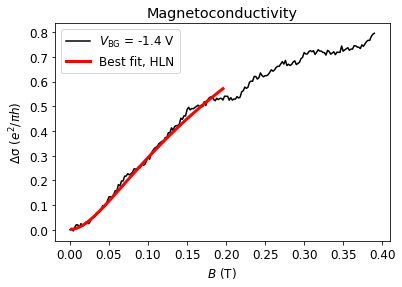

In [197]:
ns_arr_ = np.unique(data_ns['density'].values)/1e4
BG_ns_arr = np.unique(data_ns['V_BG'].values)

# Mean free path from the classical theory
sigma_B_0_arr = np.array([])
for BG in BG_ns_arr:
    para_func(data_ns, BG)
    sigma_B_0 = sigma_B.tolist()[len(sigma_B)//2]
    sigma_B_0_arr = np.append(sigma_B_0_arr, sigma_B_0)
e_len_classic_ns_arr = e_len_classic(sigma_B_0_arr, ns_arr_)

# Show a fitting example
result_arr_e, tau_phis_e, tau_phis_std_e, tau_es, tau_es_std_e = fit_WL_e(data_ns, BG_ns_arr, e_len_classic_ns_arr)
BG = -1.4
num_filter = 2
plot_fit_WL_e(data_ns, BG)

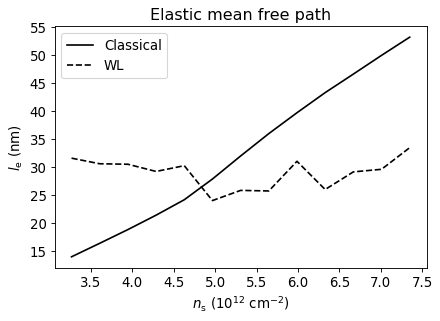

In [198]:
# Mean free path from weak localization
e_len_WL_ns_arr = np.array([])
num_filter = 5
for BG in BG_ns_arr:
    B, delta_sigma_B_norm = para_func(data_ns, BG)
    B_peak = abs(B[coverage_loc_func(delta_sigma_B_norm, num_filter)])
    e_len_WL_ns_arr = np.append(e_len_WL_ns_arr, e_len_WL(B_peak))

# Plot mean free paths
figure(figsize=(6,4), dpi=80)
plt.plot(ns_arr_/(1e12), e_len_classic_ns_arr, color="black", label="Classical")
plt.plot(ns_arr_/(1e12), e_len_WL_ns_arr, "k--", label="WL")
plt.xlabel(r'$n_\mathrm{s}\ (\mathrm{10^{12}\ cm^{-2}})$', fontsize=12)
plt.ylabel(r'$l_\mathrm{e}\ (\mathrm{nm})$', fontsize=12)
plt.title("Elastic mean free path")
plt.legend(fontsize=12)
plt.show()

# WL Model with Coherence and Spin Relaxation As Fitting Variables

In [207]:
# Fit the curves with the coherence length and spin relaxation length
# Define the fitting function

def range_fit_func(df, BG):
    global B, delta_sigma_B_norm, B_peak, B_range, B_fit
    B, delta_sigma_B_norm = para_func(df, BG)
    rep_outlier_func(delta_sigma_B_norm)
    B = np.sort(B, axis=0)
    B_peak = coverage_loc_func(delta_sigma_B_norm, num_filter)
    B_range = round((len(B)//2-B_peak)*0.5)
    B_fit = B[len(B)//2+1:len(B)//2+1+B_range]

def fit_WL_SO(df, BG_arr_ns, e_len_arr_ns):
    [tau_phis, tau_phis_std] = [[],[]]
    [tau_sos, tau_sos_std] = [[],[]]
    result_arr_so = np.array([])
    for BG in BG_arr_ns:
        data_BG = df[df['V_BG'].values >= BG]
        ns = data_BG['density'].values[0]
        range_fit_func(data_BG, BG)
        tau_e_value = e_len_arr_ns[np.where(BG_arr_ns==BG)[0][0]]/1e9/(hbar/(0.6*m_e))/np.sqrt(np.pi*ns)
        model = Model(HLN_SO)
        model.set_param_hint('alpha', value=1.0, vary=False)
        model.set_param_hint('OFFSET', value=0.0)
        model.set_param_hint('tau_phi', value=3e-12, min=2e-12, max=5e-12)
        model.set_param_hint('tau_so', value=3e-11, min=1e-11, max=8e-11)
        model.set_param_hint('tau_e', value=tau_e_value, vary=False)
        result = model.fit(delta_sigma_B_norm[len(B)//2:len(B)//2+B_range], B=B_fit)
        result_arr_so = np.append(result_arr_so, result)
        tau_phis.append(result.params['tau_phi'].value)
        tau_phis_std.append(result.params['tau_phi'].stderr)
        tau_sos.append(result.params['tau_so'].value)
        tau_sos_std.append(result.params['tau_so'].stderr)
    return result_arr_so, tau_phis, tau_phis_std, tau_sos, tau_sos_std

def plot_fit_WL_SO(df, BG):
    range_fit_func(df, BG)
    result_so = result_arr_so[np.where(BG_ns_arr==BG)][0]
    print(result_so.fit_report())
    plt.plot(B[len(B)//2:len(B)-B_peak], delta_sigma_B_norm[len(B)//2:len(B)-B_peak], 'k', label = r'$V_\mathrm{BG}$ = '+str(BG)+' V')
    plt.plot(B_fit, result_so.best_fit, 'r-', label='Best fit, HLN', linewidth=3)
    plt.xlabel(r'$B\ (\mathrm{T})$', fontsize=12)
    plt.ylabel('\u0394\u03C3 ($e^2/\u03C0h$)', fontsize=12)
    plt.title("Magnetoconductivity")
    plt.legend(fontsize=12)
    plt.show()

[[Model]]
    Model(HLN_SO)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 68
    # data points      = 98
    # variables        = 3
    chi-square         = 0.02528941
    reduced chi-square = 2.6620e-04
    Akaike info crit   = -803.709027
    Bayesian info crit = -795.954124
[[Variables]]
    alpha:    1 (fixed)
    tau_phi:  3.2479e-12 +/- 5.3788e-12 (165.61%) (init = 3e-12)
    tau_so:   8.0000e-11 +/- 1.5870e-09 (1983.77%) (init = 3e-11)
    tau_e:    5.279662e-13 (fixed)
    OFFSET:   0.01104026 +/- 0.00496200 (44.94%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(tau_phi, tau_so) = -1.000
    C(tau_so, OFFSET)  = -0.730
    C(tau_phi, OFFSET) = 0.726


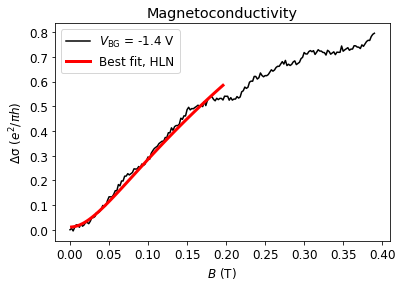

In [208]:
ns_arr_ = np.unique(data_ns['density'].values)/1e4
BG_ns_arr = np.unique(data_ns['V_BG'].values)

# Mean free path from the classical theory
sigma_B_0_arr = np.array([])
for BG in BG_ns_arr:
    para_func(data_ns, BG)
    sigma_B_0 = sigma_B.tolist()[len(sigma_B)//2]
    sigma_B_0_arr = np.append(sigma_B_0_arr, sigma_B_0)
e_len_classic_ns_arr = e_len_classic(sigma_B_0_arr, ns_arr_)

# Show a fitting example
result_arr_so, tau_phis_so, tau_phis_std_so, tau_sos, tau_sos_std = fit_WL_SO(data_ns, BG_ns_arr, e_len_classic_ns_arr)
BG = -1.4
num_filter = 2
plot_fit_WL_SO(data_ns, BG)

# WL Model with Coherence, Spin Relaxation and Mean Free Path

In [211]:
# Fit the curves with the coherence length, spin relaxation length and mean free path
# Define the fitting function

def range_fit_func(df, BG):
    global B, delta_sigma_B_norm, B_peak, B_range, B_fit
    B, delta_sigma_B_norm = para_func(df, BG)
    rep_outlier_func(delta_sigma_B_norm)
    B = np.sort(B, axis=0)
    B_peak = coverage_loc_func(delta_sigma_B_norm, num_filter)
    B_range = round((len(B)//2-B_peak)*0.3)
    B_fit = B[len(B)//2+1:len(B)//2+1+B_range]

def fit_WL(df, BG_arr_ns, e_len_arr_ns):
    [tau_phis, tau_phis_std] = [[],[]]
    [tau_sos, tau_sos_std] = [[],[]]
    result_arr = np.array([])
    for BG in BG_arr_ns:
        data_BG = df[df['V_BG'].values >= BG]
        ns = data_BG['density'].values[0]
        range_fit_func(data_BG, BG)
        tau_e_value = e_len_arr_ns[np.where(BG_arr_ns==BG)[0][0]]/1e9/(hbar/(0.6*m_e))/np.sqrt(np.pi*ns)
        model = Model(HLN)
        model.set_param_hint('alpha', value=1.0, vary=False)
        model.set_param_hint('OFFSET', value=0.0)
        model.set_param_hint('tau_phi', value=3e-12, min=2e-12, max=5e-12)
        model.set_param_hint('tau_so', value=1e-11, min=1e-12, max=2e-11)
        model.set_param_hint('tau_e', value=tau_e_value, vary=False)
        result = model.fit(delta_sigma_B_norm[len(B)//2:len(B)//2+B_range], B=B_fit)
        result_arr = np.append(result_arr, result)
        tau_phis.append(result.params['tau_phi'].value)
        tau_phis_std.append(result.params['tau_phi'].stderr)
        tau_sos.append(result.params['tau_so'].value)
        tau_sos_std.append(result.params['tau_so'].stderr)
    return result_arr, tau_phis, tau_phis_std, tau_sos, tau_sos_std

def plot_fit_WL(df, BG):
    range_fit_func(df, BG)
    result = result_arr[np.where(BG_ns_arr==BG)][0]
    print(result.fit_report())
    plt.plot(B[len(B)//2:len(B)-B_peak], delta_sigma_B_norm[len(B)//2:len(B)-B_peak], 'k', label = r'$V_\mathrm{BG}$ = '+str(BG)+' V')
    plt.plot(B_fit, result.best_fit, 'r-', label='Best fit, HLN', linewidth=3)
    plt.xlabel(r'$B\ (\mathrm{T})$', fontsize=12)
    plt.ylabel('\u0394\u03C3 ($e^2/\u03C0h$)', fontsize=12)
    plt.title("Magnetoconductivity")
    plt.legend(fontsize=12)
    plt.show()

[[Model]]
    Model(HLN)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 30
    # data points      = 58
    # variables        = 3
    chi-square         = 0.00910162
    reduced chi-square = 1.6548e-04
    Akaike info crit   = -502.065284
    Bayesian info crit = -495.883955
[[Variables]]
    alpha:    1 (fixed)
    tau_phi:  2.7649e-12 +/- 6.5515e-08 (2369538.66%) (init = 3e-12)
    tau_so:   1.6787e-11 +/- 1.8114e-06 (10790209.12%) (init = 1e-11)
    tau_e:    5.279662e-13 (fixed)
    OFFSET:   0.01053068 +/- 0.00327131 (31.06%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(tau_phi, tau_so) = -1.000
    C(tau_so, OFFSET)  = -0.411
    C(tau_phi, OFFSET) = 0.411


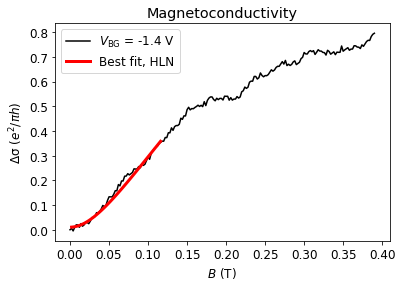

In [213]:
ns_arr_ = np.unique(data_ns['density'].values)/1e4
BG_ns_arr = np.unique(data_ns['V_BG'].values)

# Mean free path from the classical theory
sigma_B_0_arr = np.array([])
for BG in BG_ns_arr:
    para_func(data_ns, BG)
    sigma_B_0 = sigma_B.tolist()[len(sigma_B)//2]
    sigma_B_0_arr = np.append(sigma_B_0_arr, sigma_B_0)
e_len_classic_ns_arr = e_len_classic(sigma_B_0_arr, ns_arr_)

# Show a fitting example
result_arr, tau_phis, tau_phis_std, tau_sos_, tau_sos_std_ = fit_WL(data_ns, BG_ns_arr, e_len_classic_ns_arr)
BG = -1.4
num_filter = 2
plot_fit_WL(data_ns, BG)

# Carrier Density Dependence of Coherence and Relaxation Length

In [151]:
import math
# Plot coherence len and mean free path

def coh_len_func(tau_phis, tau_phis_std, tau_es, ns_arr):
    [coh_len, coh_len_std] = [[],[]]
    for tau_phi_BG in tau_phis:
        ns = ns_arr[tau_phis.index(tau_phi_BG)]*1e4
        tau_e_BG = tau_es[tau_phis.index(tau_phi_BG)]
        D = 1/2*(hbar/(0.6*m_e))**2*(4*np.pi*ns)/g*tau_e_BG
        coh_len.append(math.sqrt(D*tau_phi_BG)*1e9)
        coh_len_std.append(1/2*math.sqrt(D)*tau_phi_BG**(-1/2)*tau_phis_std[tau_phis.index(tau_phi_BG)]*1e9)
    coh_len_error = [element*3 for element in coh_len_std] # 3-sigma confidence
    return coh_len, coh_len_error

def coh_so_len_func(tau_phis, tau_phis_std, tau_sos, tau_sos_std, tau_es, ns_arr):
    [coh_len, coh_len_std] = [[],[]]
    [so_len, so_len_std] = [[],[]]
    for tau_phi_BG in tau_phis:
        ns = ns_arr[tau_phis.index(tau_phi_BG)]*1e4
        tau_e_BG = tau_es[tau_phis.index(tau_phi_BG)]
        tau_so_BG = tau_sos[tau_phis.index(tau_phi_BG)]
        D = 1/2*(hbar/(0.6*m_e))**2*(4*np.pi*ns)/g*tau_e_BG
        coh_len.append(math.sqrt(D*tau_phi_BG)*1e9)
        coh_len_std.append(1/2*math.sqrt(D)*tau_phi_BG**(-1/2)*tau_phis_std[tau_phis.index(tau_phi_BG)]*1e9)
        so_len.append(math.sqrt(D*tau_so_BG)*1e9)
        so_len_std.append(1/2*math.sqrt(D)*tau_so_BG**(-1/2)*tau_sos_std[tau_sos.index(tau_so_BG)]*1e9)
    coh_len_error = [element*3 for element in coh_len_std] # 3-sigma confidence
    so_len_error = [element*3 for element in so_len_std] # 3-sigma confidence
    return coh_len, coh_len_error, so_len, so_len_error

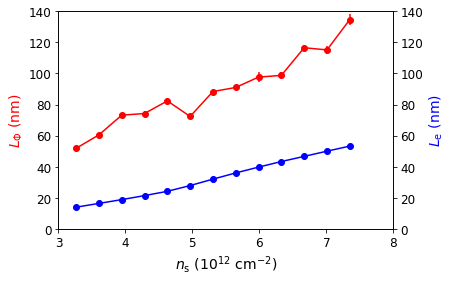

In [152]:
# Plot the carrier density dependence of the coh lens
coh_len, coh_len_error = coh_len_func(tau_phis_e, tau_phis_std_e, tau_es, ns_arr_)
fig, ax = plt.subplots(figsize=(6,4))
ax.errorbar(ns_arr_/1e12, coh_len, yerr=coh_len_error, color="red", marker="o")
ax.set_xlabel(r'$n_\mathrm{s}\ (\mathrm{10^{12}\ cm^{-2}})$', fontsize=14)
ax.set_ylabel(r'$L_\mathrm{Φ}\ (\mathrm{nm})$', color = "red", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim([3,8])
ax.set_ylim([0,140])
ax2=ax.twinx()
ax2.errorbar(ns_arr_/1e12, e_len_classic_ns_arr, color="blue", marker="o")
ax2.set_ylabel(r'$L_\mathrm{e}\ (\mathrm{nm})$', color="blue", fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylim([0,140])
plt.show()

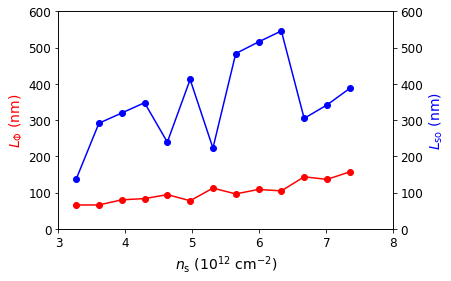

In [154]:
# Plot the carrier density dependence of the coh and spin relaxation lens
coh_len, coh_len_error, so_len, so_len_error = coh_so_len_func(tau_phis_so, tau_phis_std_so, tau_sos, tau_sos_std, tau_es, ns_arr_)
fig, ax = plt.subplots(figsize=(6,4))
ax.errorbar(ns_arr_/1e12, coh_len, color="red", marker="o", capsize=5)
ax.set_xlabel(r'$n_\mathrm{s}\ (\mathrm{10^{12}\ cm^{-2}})$', fontsize=14)
ax.set_ylabel(r'$L_\mathrm{Φ}\ (\mathrm{nm})$', color = "red", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim([3,8])
ax.set_ylim([0,600])
ax2=ax.twinx()
ax2.errorbar(ns_arr_/1e12, so_len, color="blue", marker="o", capsize=5)
ax2.set_ylabel(r'$L_\mathrm{so}\ (\mathrm{nm})$', color="blue", fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylim([0,600])
plt.show()

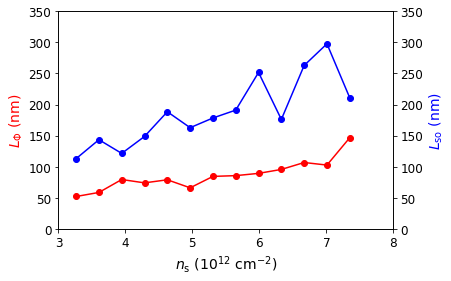

In [155]:
# Plot the carrier density dependence of the coh and spin relaxation lens, and mean free paths
coh_len, coh_len_error, so_len, so_len_error = coh_so_len_func(tau_phis, tau_phis_std, tau_sos_, tau_sos_std_, tau_es, ns_arr_)
fig, ax = plt.subplots(figsize=(6,4))
ax.errorbar(ns_arr_/1e12, coh_len, color="red", marker="o", capsize=5)
ax.set_xlabel(r'$n_\mathrm{s}\ (\mathrm{10^{12}\ cm^{-2}})$', fontsize=14)
ax.set_ylabel(r'$L_\mathrm{Φ}\ (\mathrm{nm})$', color = "red", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim([3,8])
ax.set_ylim([0,350])
ax2=ax.twinx()
ax2.errorbar(ns_arr_/1e12, so_len, color="blue", marker="o", capsize=5)
ax2.set_ylabel(r'$L_\mathrm{so}\ (\mathrm{nm})$', color="blue", fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_ylim([0,350])
plt.show()

# Temperature Dependence

In [59]:
'Import Data'
file_path = r"Data\83_WeakLoc_TG11p5V_T5K"
data = Data_Reader.data_reader(file_path)
data_5K = data.sort_values(by=['V_TG','V_BG']).reset_index(drop=True)
file_path = r"Data\84_WeakLoc_TG11p5V_T4K"
data = Data_Reader.data_reader(file_path)
data_4K = data.sort_values(by=['V_TG','V_BG']).reset_index(drop=True)
file_path = r"Data\85_WeakLoc_TG11p5V_T3K"
data = Data_Reader.data_reader(file_path)
data_3K = data.sort_values(by=['V_TG','V_BG']).reset_index(drop=True)
file_path = r"Data\86_WeakLoc_TG11p5V_T2p5K"
data = Data_Reader.data_reader(file_path)
data_2p5K = data.sort_values(by=['V_TG','V_BG']).reset_index(drop=True)
file_path = r"Data\87_WeakLoc_TG11p5V_T2K"
data = Data_Reader.data_reader(file_path)
data_2K = data.sort_values(by=['V_TG','V_BG']).reset_index(drop=True)
file_path = r"Data\88_WeakLoc_TG11p5V_T1p65K"
data = Data_Reader.data_reader(file_path)
data_1p65K = data.sort_values(by=['V_TG','V_BG']).reset_index(drop=True)
file_path = r"Data\89_WeakLoc_TG11p5V_baseT"
data = Data_Reader.data_reader(file_path)
data_base = data.sort_values(by=['V_TG','V_BG']).reset_index(drop=True)

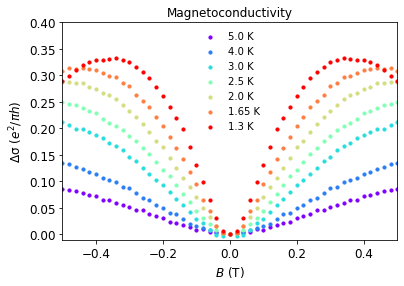

In [139]:
# Plot the temperature dependence of the weak localization
data_temps = [data_5K, data_4K, data_3K, data_2p5K, data_2K, data_1p65K, data_base]
temps = [5.0, 4.0, 3.0, 2.5, 2.0, 1.65, 1.3]
colors = cm.rainbow(np.linspace(0,1,len(temps)))
delta_sigma_B_norm_temp = []
BG = -5.5

for idx in range(len(data_temps)):
    if BG == -6.0 and idx == 6:
        data_temp_ = data_temps[idx][data_temps[idx]['V_BG'].values==BG]
        data_temp_ = data_temp_[:len(data_temps[idx])//3]
    else:
        data_temp_ = data_temps[idx][data_temps[idx]['V_BG'].values==BG]
        data_temp_ = data_temp_[:len(data_temp_)//2]
    B, delta_sigma_B_norm = para_func(data_temp_, BG)
    delta_sigma_B_norm_temp.append(delta_sigma_B_norm)
    plt.scatter(B, delta_sigma_B_norm, s=10, label=str(temps[idx])+" K", color=colors[idx])
    plt.xlabel(r'$B\ (\mathrm{T})$', fontsize=12)
    plt.ylabel('\u0394\u03C3 ($e^2/\u03C0h$)', fontsize=12)
    plt.xlim(left=-0.5, right=0.5)
    plt.ylim(bottom=-0.01, top=0.4)
    plt.title("Magnetoconductivity", fontsize=12)
    plt.legend(fontsize=10, frameon=False)

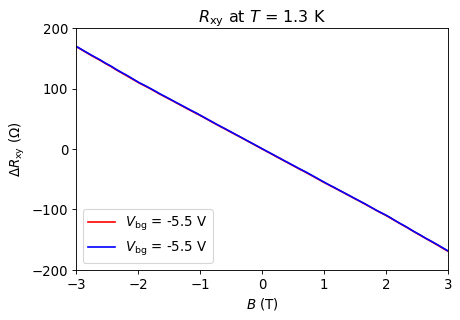

In [145]:
# Would there be any hysteresis in R_xy?
plt.figure(figsize=(6,4), dpi=80)
BG = -5.5
idx = 6
if BG == -6.0 and idx == 6:
    data_temp_ = data_temps[idx][data_temps[idx]['V_BG'].values==BG]
    data_temp_forth = data_temp_[:len(data_temp_)//3]
    data_temp_back = data_temp_[len(data_temp_)//3:2*len(data_temp_)//3]
else:
    data_temp_ = data_temps[idx][data_temps[idx]['V_BG'].values==BG]
    data_temp_forth = data_temp_[:len(data_temp_)//2]
    data_temp_back = data_temp_[len(data_temp_)//2:-1]
Rxy_B_forth = (data_temp_forth[data_temp_forth['B']!=0]['V2_AC'])/(data_temp_forth[data_temp_forth['B']!=0]['I_SD_AC'])
Rxy_B_back = (data_temp_back[data_temp_back['B']!=0]['V2_AC'])/(data_temp_back[data_temp_back['B']!=0]['I_SD_AC'])
Rxy_B_forth_norm = (Rxy_B_forth.values-Rxy_B_forth.values[::-1])/2
Rxy_B_back_norm = (Rxy_B_back.values-Rxy_B_back.values[::-1])/2
plt.plot(data_temp_forth['B'], Rxy_B_forth_norm, 'r', label = r'$V_\mathrm{bg}$'+" = "+str(BG)+" V")
plt.plot(data_temp_back['B'], Rxy_B_back_norm, 'b', label = r'$V_\mathrm{bg}$'+" = "+str(BG)+" V")
plt.xlim(-3,3)
plt.ylim(-200,200)
plt.yticks(np.arange(-200,201,100))
plt.xlabel(r'$B\ (\mathrm{T})$', fontsize=12)
plt.ylabel('\u0394'+r'$R_\mathrm{xy}\ $'+'(\u03A9)', fontsize=12)
plt.title(r'$R_\mathrm{xy}\ $'+'at '+r'$T\ $'+'= 1.3 K')
plt.legend(fontsize=12, loc='lower left')

# Mean free path as a function of temperature

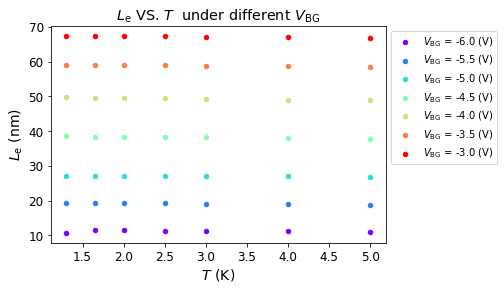

In [61]:
# By Classical Model
BG_arr_temp = np.linspace(-6,-3,7)
ns_arr_temp = cap_func(BG_arr_temp)
colors = cm.rainbow(np.linspace(0,1,len(BG_arr_temp)))
TG = 11.5

e_len_temp_BGs = []
for BG in BG_arr_temp:
    sigma_B_0_arr = np.array([])
    for idx in range(len(temps)):
        data_temp_ = data_temps[idx][data_temps[idx]['V_BG'].values==BG]
        data_temp_ = data_temp_[:len(data_temp_)//2]
        para_func(data_temp_ , BG)
        sigma_B_0 = sigma_B.tolist()[len(sigma_B)//2]
        sigma_B_0_arr = np.append(sigma_B_0_arr, sigma_B_0)
    e_len_temp = e_len_classic(sigma_B_0_arr, ns_arr_temp[np.where(BG_arr_temp==BG)])
    e_len_temp_BGs.append(e_len_temp)
    plt.scatter(temps, e_len_temp, s=20, label = r'$V_\mathrm{BG}\ \mathrm{}$'+'= '+str(BG)+ ' (V)', color=colors[np.where(BG_arr_temp==BG)])
    plt.xlabel(r'$T_\mathrm{}\ (\mathrm{K})$', fontsize=14)
    plt.ylabel(r'$L_\mathrm{e}\ (\mathrm{nm})$', fontsize=14)
    plt.title(r'$L_\mathrm{e}$' + ' VS. ' + r'$T\ \mathrm{}$' + ' under different ' + r'$V_\mathrm{BG}$')
    plt.legend(fontsize=10, bbox_to_anchor=(1,1))
plt.show()

e_len_BG_temps = []
for idx in range(len(temps)):
    sigma_B_0_arr = np.array([])
    for BG in BG_arr_temp:
        data_temp_ = data_temps[idx][data_temps[idx]['V_BG'].values==BG]
        data_temp_ = data_temp_[:len(data_temp_)//2]
        para_func(data_temp_ , BG)
        sigma_B_0 = sigma_B.tolist()[len(sigma_B)//2]
        sigma_B_0_arr = np.append(sigma_B_0_arr, sigma_B_0)
    e_len_BG = e_len_classic(sigma_B_0_arr, ns_arr_temp[np.where(BG_arr_temp==BG)])
    e_len_BG_temps.append(e_len_BG)

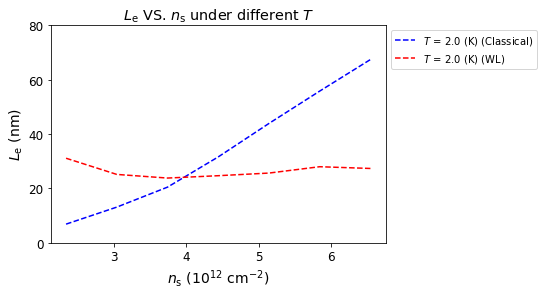

In [62]:
# By WL Model
e_len_BG_temps_WL = []
num_filter = 5
for temp in temps:
    idx = temps.index(temp)
    e_len_BG_temp_WL = []
    for BG in BG_arr_temp:    
        data_temp_ = data_temps[idx][data_temps[idx]['V_BG'].values==BG]
        B, delta_sigma_B_norm = para_func(data_temp_, BG)
        B_peak = abs(B[coverage_loc_func(delta_sigma_B_norm, num_filter)])
        e_len_BG_temp_WL.append(e_len_WL(B_peak))
    e_len_BG_temps_WL.append(e_len_BG_temp_WL)

# Plot to compare the mean free paths by the classical and weak localization models
temp = 2.0
idx = temps.index(temp)
plt.plot(ns_arr_temp/1e12, e_len_BG_temps[idx], '--b', label = r'$T_\mathrm{}\ \mathrm{}$'+'= '+str(temp)+ ' (K) (Classical)')
plt.plot(ns_arr_temp/1e12, e_len_BG_temps_WL[idx], '--r', label = r'$T_\mathrm{}\ \mathrm{}$'+'= '+str(temp)+ ' (K) (WL)')
plt.xlabel(r'$n_\mathrm{s}\ (\mathrm{10^{12}\ cm^{-2}})$', fontsize=14)
plt.ylabel(r'$L_\mathrm{e}\ (\mathrm{nm})$', fontsize=14)
plt.yticks(np.arange(0,81,20))
plt.title(r'$L_\mathrm{e}$' + ' VS. ' + r'$n_\mathrm{s}$' + ' under different ' + r'$T_\mathrm{}$')
plt.legend(fontsize=10, bbox_to_anchor=(1,1))
plt.show()

In [63]:
# Temperature dependence of the coherence length 
# Define the extraction function

def fit_WL_temp(BG_arr, data_temps, e_len_arr):
    [tau_phis, tau_phis_std] = [[],[]]
    [tau_es, tau_es_std] = [[],[]]
    result_arr = np.array([])
    for BG in BG_arr:
        [tau_phi_temp, tau_phi_std_temp] = [[],[]]
        [tau_e_temp, tau_e_std_temp] = [[],[]]
        result_arr_temp = np.array([])
        for idx in range(len(temps)):
            data_temp_ = data_temps[idx][data_temps[idx]['V_BG'].values==BG]
            data_temp_ = data_temp_[:len(data_temp_)//2]
            range_fit_func(data_temp_, BG)
            ns = cap_func(BG_arr)[np.where(BG_arr==BG)]*1e4
            tau_e_value = e_len_arr[np.where(BG_arr==BG)[0][0]][idx]/1e9/(hbar/(0.6*m_e))/np.sqrt(np.pi*ns)
            model = Model(HLN_e)
            model.set_param_hint('alpha', value=1.0, vary=False)
            model.set_param_hint('OFFSET', value=0.0)
            model.set_param_hint('tau_phi', value=1e-12, min=1e-13, max=1e-11)
            model.set_param_hint('tau_e', value=tau_e_value, vary=False)
            if BG == -6.0 and idx == 6:
                B_fit_adj = B[300:310]
                result = model.fit(delta_sigma_B_norm[300:310], B=B_fit_adj)
            else:
                result = model.fit(delta_sigma_B_norm[len(B)//2:len(B)//2+B_range], B=B_fit)
            result_arr_temp = np.append(result_arr_temp, result)
            tau_phi_temp.append(result.params['tau_phi'].value)
            tau_phi_std_temp.append(result.params['tau_phi'].stderr)
            tau_e_temp.append(result.params['tau_e'].value)
            tau_e_std_temp.append(result.params['tau_e'].stderr)
        tau_phis.append(tau_phi_temp)
        tau_phis_std.append(tau_phi_std_temp)
        tau_es.append(tau_e_temp)
        tau_es_std.append(tau_e_std_temp)
        result_arr = np.append(result_arr, result_arr_temp)
    return result_arr, tau_phis, tau_phis_std, tau_es, tau_es_std

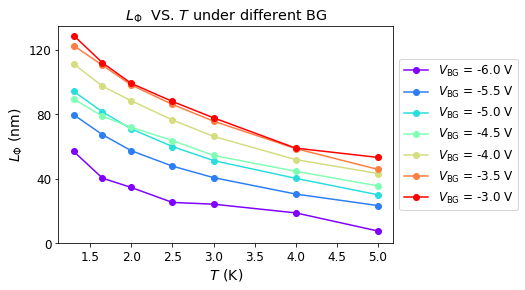

In [64]:
# Fit the temperature dependence and plot the result

coh_len = []
result_arr, tau_phis, tau_phis_std, tau_es, tau_es_std = fit_WL_temp(BG_arr_temp, data_temps, e_len_temp_BGs)
for tau_phi_temp, tau_phi_std_temp, tau_e_temp in zip(tau_phis, tau_phis_std, tau_es):
    idx = tau_es.index(tau_e_temp)
    coh_len_temp, coh_len_error = coh_len_func(tau_phi_temp, tau_phi_std_temp, tau_e_temp, ns_arr_temp)
    coh_len.append(coh_len_temp)
    plt.plot(temps, coh_len_temp, marker="o", label=r'$V_\mathrm{BG}$'+' = '+str(BG_arr_temp[idx])+' V', color=colors[idx])
    plt.xlabel(r'$T_\mathrm{}\ (\mathrm{K})$', fontsize=14)
    plt.ylabel(r'$L_\mathrm{Φ}\ (\mathrm{nm})$', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.yticks(np.arange(0,140,40))
    plt.title(r'$L_\mathrm{Φ}\ \mathrm{}$'+' VS. '+ r'$T_\mathrm{}\ \mathrm{}$'+ 'under different BG')
    plt.legend(fontsize=12, ncol=1, loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

# Dephasing Mechansim in MoS2

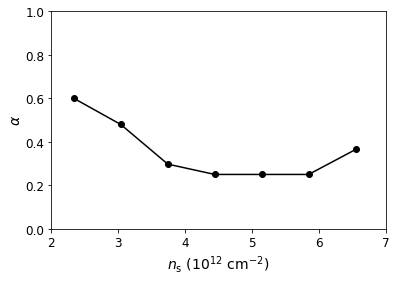

In [67]:
# Fitting the temperature dependence by power law

def WL_T(T, factor, alpha, OFFSET):
    return factor*np.power(T,-alpha)+OFFSET

alphas = []
for coh_len_temp in coh_len:
    model = Model(WL_T)
    model.set_param_hint('factor', value=1.0, vary=True)
    model.set_param_hint('alpha', value=0.5, min=0.25, max=0.6)
    model.set_param_hint('OFFSET', value=0.0, vary=True)
    result = model.fit(coh_len_temp, T=temps)
    alphas.append(result.params['alpha'].value)

fig,ax = plt.subplots()
ax.plot(ns_arr_temp/1e12, alphas, color="black", marker="o")
ax.set_xlabel(r'$n_\mathrm{s}\ (\mathrm{10^{12}\ cm^{-2}})$', fontsize=14)
ax.set_ylabel(r'$α_\mathrm{}$', color="black", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim([2.0,7.0])
ax.set_ylim([0.0,1.0])
plt.show()

# Varying Displacement Field at Constant Carrier Density

In [40]:
# Calculate displacement field
def cal_D(TG, C_TG, BG, C_BG):
    return (C_TG*TG-C_BG*BG)/(2*epsilon_0)

In [41]:
'Import Data'
# High resolution data at density ~ 3.0e12 cm-2
file_path = r"Data\99_WeakLoc_ConstDensity3E12_baseT_highres"
data = Data_Reader.data_reader(file_path)
data_dis_low_ns = data.sort_values(by=['V_BG','B']).reset_index(drop=True)

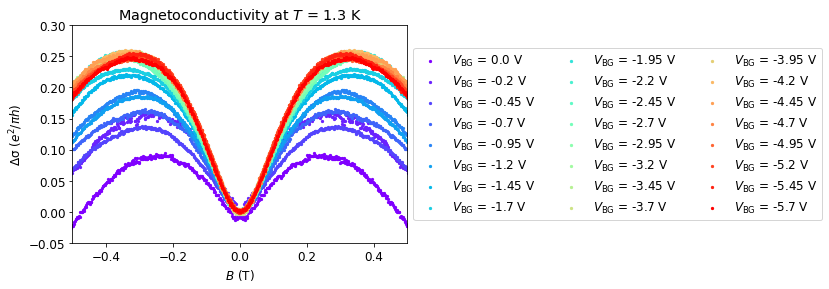

In [42]:
# Visualize the data
BG_arr_dis_low_ns = np.unique(data_dis_low_ns['V_BG'].values)
TG_arr_dis_low_ns = np.unique(data_dis_low_ns['V_TG'].values)
BG_arr_dis_low_ns = np.flip(BG_arr_dis_low_ns)
ns_const_low = 3.3e16
cap_func(BG_arr_dis_low_ns)
D_low_ns = [round(cal_D(TG, C_TG, BG, C_BG)/1e9, 2) for TG, BG in zip(TG_arr_dis_low_ns, BG_arr_dis_low_ns)]
colors = cm.rainbow(np.linspace(0,1,len(BG_arr_dis_low_ns)))

for BG in BG_arr_dis_low_ns:
    B, delta_sigma_B_norm = para_func(data_dis_low_ns, BG)
    plt.scatter(B, delta_sigma_B_norm, s=5, color=colors[np.where(BG_arr_dis_low_ns==BG)], label = r'$V_\mathrm{BG}$'+" = "+str(round(BG,2))+" V")
    plt.xlabel(r'$B\ (\mathrm{T})$', fontsize=12)
    plt.xlim(-0.5,0.5)
    plt.ylabel('\u0394\u03C3 ($e^2/\u03C0h$)', fontsize=12)
    plt.ylim(-0.05,0.3)
    plt.title("Magnetoconductivity at "+r'$T\ $'+"= 1.3 K")
    plt.legend(fontsize=12, ncol=3, loc='center left', bbox_to_anchor=(1,0.5))

mean free path: 29.43 nm
coherence len: 46.44 nm


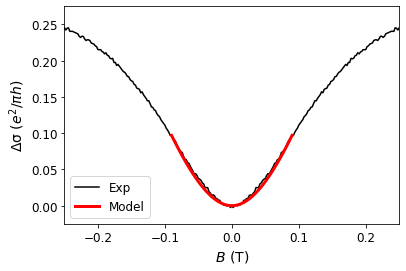

In [43]:
# Experimental WL and the modelled WL -- neglect gauge factor
BG = -5.2
B, delta_sigma_B_norm = para_func(data_dis_low_ns, BG)
range_fit_func(data_dis_low_ns, BG)
B_model = np.array(B_fit)
B_conv = B[B_peak:len(B)-B_peak]

# Optimize parameters
B_0 = 1e-10
diffs = []
ratios = []
for r_e in np.linspace(0.5,5,51):
    for r_phi in np.linspace(0.5,5,51):
        for r_is in np.linspace(100,1000,11):
            tau_e = r_e*0.3e-12
            tau_phi = r_phi*2.0e-12
            tau_is = r_is*tau_e
            tau_gauge = 1e10*tau_e
            delta_sigma_B_model = HLN_A(B_model, B_0, tau_e, tau_is, tau_gauge, tau_phi)
            diff = sum([(element_model-element_exp)**2 for element_model,element_exp in zip(delta_sigma_B_model,delta_sigma_B_norm[len(B)//2:len(B)-B_peak])])
            diffs.append(diff)
            ratios.append([r_e,r_phi,r_is])
ratio_opt = ratios[diffs.index(min(diffs))]            

tau_e = ratio_opt[0]*0.3e-12
tau_phi = ratio_opt[1]*2.0e-12
tau_is = ratio_opt[2]*tau_e
tau = 1/(1/tau_e+1/tau_is+1/tau_gauge)
D = 1/2*(hbar/0.6/m_e)**2*(4*np.pi*ns)/g*tau
l_e = (tau_e*D)**0.5*1e9
l_phi = (tau_phi*D)**0.5*1e9
print('mean free path: '+str(round(l_e,2))+' nm\n'+'coherence len: '+str(round(l_phi,2))+' nm')

delta_sigma_B_fit = HLN_A(B_fit, B_0, tau_e, tau_is, tau_gauge, tau_phi)
plt.plot(B, delta_sigma_B_norm, color = 'k', label='Exp')
plt.plot(B_model, delta_sigma_B_fit, color = 'r', linewidth = 3, label='Model')
plt.plot(-B_model, delta_sigma_B_fit, color = 'r', linewidth = 3)
plt.xlabel(r'$B\ (\mathrm{T})$', fontsize=14)
plt.ylabel('\u0394\u03C3 ($e^2/\u03C0h$)', fontsize=14)
plt.xlim(-0.25,0.25)
plt.ylim(-0.025,0.275)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12)

[[Model]]
    Model(HLN_A)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 27
    # data points      = 45
    # variables        = 2
    chi-square         = 5.0231e-04
    reduced chi-square = 1.1682e-05
    Akaike info crit   = -509.133446
    Bayesian info crit = -505.520121
[[Variables]]
    B_0:        1e-10 (fixed)
    tau_e:      4.74e-13 (fixed)
    tau_is:     9.9997e-07 +/- 0.00582668 (582687.82%) (init = 1e-09)
    tau_gauge:  9.9998e-07 +/- 0.00206966 (206971.04%) (init = 1e-09)
    tau_phi:    1.18e-12 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(tau_is, tau_gauge) = -0.968
mean free path: 29.447346256640632 nm


C:\Users\TINGYU\AppData\Local\Temp/ipykernel_14848/1284617520.py:26: RuntimeWarning: invalid value encountered in log
  delta_sigma_B += -c_s*(np.log(hbar*tau_reciprocal/(4*e*D*B))-psi(1/2+(B_s+B_phi)/B))


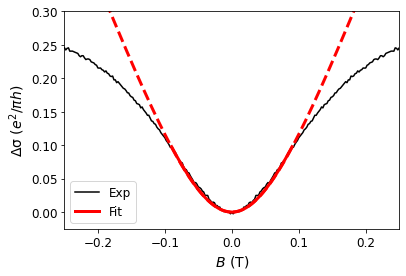

In [44]:
# Experimental WL and the modelled WL -- include gauge factor
# Input parameters into HLN model
model = Model(HLN_A)
model.set_param_hint('B_0', value=1e-10, vary=False)
model.set_param_hint('tau_e', value=tau_e, vary=False)
model.set_param_hint('tau_phi', value=tau_phi, vary=False)
model.set_param_hint('tau_is', value=1e-9, min=1e-15, max=1e-6, vary=True)
model.set_param_hint('tau_gauge', value=1e-9, min=1e-15, max=1e-6, vary=True)

# Fitting for the best range
result = model.fit(delta_sigma_B_norm[len(B)//2+1:len(B)//2+1+B_range], B=B_model)
print(result.fit_report())
# Extend the fitting for comparison
delta_sigma_B_model = HLN_A(B_conv, B_0, tau_e, tau_is, tau_gauge, tau_phi)

plt.plot(B, delta_sigma_B_norm, color = 'k', label='Exp')
plt.plot(B_model, result.best_fit, color = 'r', linewidth = 3, label='Fit')
plt.plot(-B_model, result.best_fit, color = 'r', linewidth = 3)
plt.plot(B_conv, delta_sigma_B_model, '--r', linewidth = 3)
plt.plot(-B_conv, delta_sigma_B_model, '--r', linewidth = 3)
plt.xlabel(r'$B\ (\mathrm{T})$', fontsize=14)
plt.ylabel('\u0394\u03C3 ($e^2/\u03C0h$)', fontsize=14)
plt.xlim(-0.25,0.25)
plt.ylim(-0.025,0.3)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12)

D = 1/2*(hbar/0.6/m_e)**2*(4*np.pi*ns)/g*tau_e
l_e = (result.params['tau_e'].value*D)**0.5*1e9
print('mean free path: '+str(l_e)+' nm')

In [45]:
# Estimate the turning point in Fig.4 in 10.1103/PhysRevB.90.235429

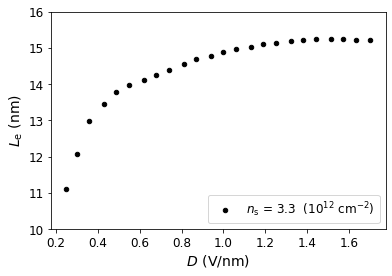

In [46]:
# Mean free path from the classical theory
# At varied displacement field and constant low carrier density
sigma_B_0_arr_dis_low_ns = np.array([])
for TG in TG_arr_dis_low_ns:
    data_para = data_dis_low_ns[data_dis_low_ns['V_TG'].values==TG]
    Rxx_B = (data_para[data_para['B']!=0]['V1_AC'])/(data_para[data_para['B']!=0]['I_SD_AC'])
    Rxy_B = (data_para[data_para['B']!=0]['V2_AC'])/(data_para[data_para['B']!=0]['I_SD_AC'])
    Rouxx_B = Rxx_B*W/L
    Rouxy_B = Rxy_B
    sigma_B = Rouxx_B/(Rouxx_B**2+Rouxy_B**2)
    sigma_B_0 = sigma_B.tolist()[len(sigma_B.tolist())//2]
    sigma_B_0_arr_dis_low_ns = np.append(sigma_B_0_arr_dis_low_ns, sigma_B_0)
e_len_arr_dis_low_ns = e_len_classic(sigma_B_0_arr_dis_low_ns, ns_const_low/1e4)

plt.scatter(D_low_ns, e_len_arr_dis_low_ns, s=20, color='k', label=r'$n_\mathrm{s}$'+' = 3.3 '+r'$\ (\mathrm{10^{12}\ cm^{-2}})$')
plt.xlabel(r'$D_\mathrm{}$'+' (V/nm)', fontsize=14)
plt.ylabel(r'$L_\mathrm{e}\ (\mathrm{nm})$', fontsize=14)
plt.ylim([10,16])
plt.legend(fontsize=12, loc='lower right')
plt.show()

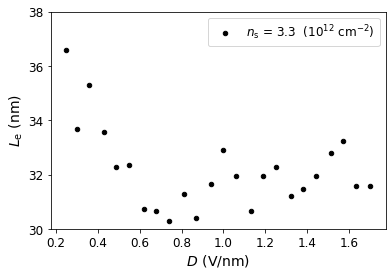

In [76]:
# Mean free path from weak localization
e_len_low_ns_dis_WL = []
for BG in BG_arr_dis_low_ns:
    data_para = data_dis_low_ns[data_dis_low_ns['V_BG'].values==BG]
    B, delta_sigma_B_norm = para_func(data_para, BG)
    B_peak = abs(B[coverage_loc_func(delta_sigma_B_norm, num_filter)])
    e_len_low_ns_dis_WL.append(e_len_WL(B_peak))

plt.scatter(D_low_ns, e_len_low_ns_dis_WL, s=20, color='k', label=r'$n_\mathrm{s}$'+' = 3.3 '+r'$\ (\mathrm{10^{12}\ cm^{-2}})$')
plt.xlabel(r'$D_\mathrm{}$'+' (V/nm)', fontsize=14)
plt.ylabel(r'$L_\mathrm{e}\ (\mathrm{nm})$', fontsize=14)
plt.yticks(np.arange(30,39,2))
plt.legend(fontsize=12, loc='upper right')
plt.show()

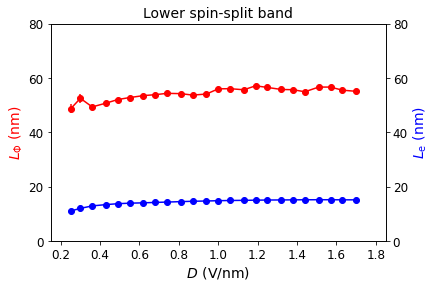

In [47]:
# Plot phase coherence & mean free path with fixed carrier density ~ 3.3e12 cm-2

result_arr, tau_phis, tau_phis_std, tau_es, tau_es_std = fit_WL(data_dis_low_ns, BG_arr_dis_low_ns, e_len_arr_dis_low_ns)
ns_arr_const_low = [ns_const_low/1e4]*len(BG_arr_dis_low_ns)
coh_len, coh_len_error = coh_len_func(tau_phis, tau_phis_std, tau_es, ns_arr_const_low)

fig, ax = plt.subplots(figsize=(6,4))
ax.errorbar(D_low_ns, coh_len, yerr=coh_len_error, color="red", marker="o")
ax.set_xlabel(r'$D_\mathrm{}$'+' (V/nm)', fontsize=14)
ax.set_ylabel(r'$L_\mathrm{Φ}\ (\mathrm{nm})$', color = "red", fontsize=14)
ax.set_title('Lower spin-split band', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim([0.15,1.85])
ax.set_yticks(np.arange(0,81,20))
ax2=ax.twinx()
ax2.plot(D_low_ns, e_len_arr_dis_low_ns, color="blue", marker="o")
ax2.set_ylabel(r'$L_\mathrm{e}\ (\mathrm{nm})$', color="blue", fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_yticks(np.arange(0,81,20))
plt.show()

In [48]:
'Import Data'
# High resolution data at density ~ 5.4e12 cm-2
file_path = r"Data\113_WeakLoc_constn5E12_baseT"
data = Data_Reader.data_reader(file_path)
data_dis_high_ns = data.sort_values(by=['V_BG','B']).reset_index(drop=True)

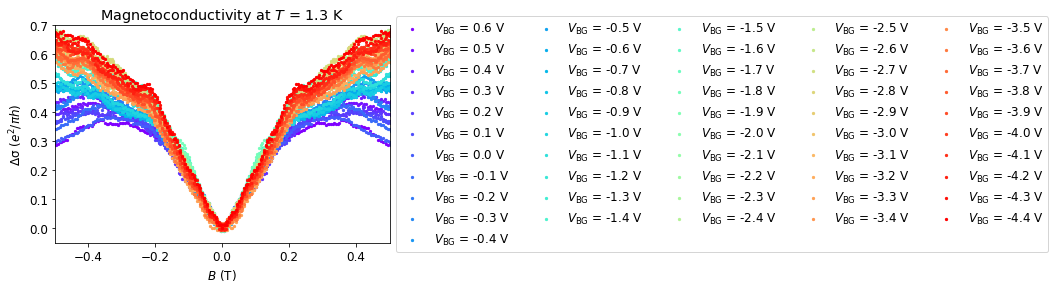

In [49]:
# Visualize the data
BG_arr_dis_high_ns = np.unique(data_dis_high_ns['V_BG'].values)
TG_arr_dis_high_ns = np.unique(data_dis_high_ns['V_TG'].values)
BG_arr_dis_high_ns = np.flip(BG_arr_dis_high_ns)
ns_const_high = 5.4e16
cap_func(BG_arr_dis_high_ns)
D_high_ns = [round(cal_D(TG, C_TG, BG, C_BG)/1e9, 2) for TG, BG in zip(TG_arr_dis_high_ns, BG_arr_dis_high_ns)]
colors = cm.rainbow(np.linspace(0,1,len(BG_arr_dis_high_ns)))

for BG in BG_arr_dis_high_ns:
    B, delta_sigma_B_norm = para_func(data_dis_high_ns, BG)
    plt.scatter(B, delta_sigma_B_norm, s=5, color=colors[np.where(BG_arr_dis_high_ns==BG)], label = r'$V_\mathrm{BG}$'+" = "+str(round(BG,2))+" V")
    plt.xlabel(r'$B\ (\mathrm{T})$', fontsize=12)
    plt.xlim(-0.5,0.5)
    plt.ylabel('\u0394\u03C3 ($e^2/\u03C0h$)', fontsize=12)
    plt.ylim(-0.05,0.7)
    plt.title("Magnetoconductivity at "+r'$T\ $'+"= 1.3 K")
    plt.legend(fontsize=12, ncol=5, loc='center left', bbox_to_anchor=(1,0.5))

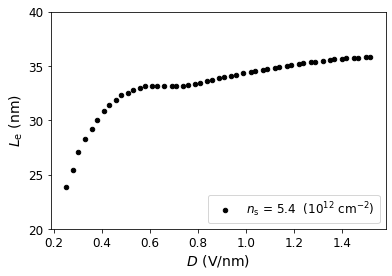

In [50]:
# Mean free path from the classical theory
# At varied displacement field and constant high carrier density
sigma_B_0_arr_dis_high_ns = np.array([])
for TG in TG_arr_dis_high_ns:
    data_para = data_dis_high_ns[data_dis_high_ns['V_TG'].values==TG]
    Rxx_B = (data_para[data_para['B']!=0]['V1_AC'])/(data_para[data_para['B']!=0]['I_SD_AC'])
    Rxy_B = (data_para[data_para['B']!=0]['V2_AC'])/(data_para[data_para['B']!=0]['I_SD_AC'])
    Rouxx_B = Rxx_B*W/L
    Rouxy_B = Rxy_B
    sigma_B = Rouxx_B/(Rouxx_B**2+Rouxy_B**2)
    sigma_B_0 = sigma_B.tolist()[len(sigma_B.tolist())//2]
    sigma_B_0_arr_dis_high_ns = np.append(sigma_B_0_arr_dis_high_ns, sigma_B_0)
e_len_arr_dis_high_ns = e_len_classic(sigma_B_0_arr_dis_high_ns, ns_const_high/1e4)
e_len_arr_dis_high_ns = [round(element,5) for element in e_len_arr_dis_high_ns]

plt.scatter(D_high_ns, e_len_arr_dis_high_ns, s=20, color='k', label=r'$n_\mathrm{s}$'+' = 5.4 '+r'$\ (\mathrm{10^{12}\ cm^{-2}})$')
plt.xlabel(r'$D_\mathrm{}$'+' (V/nm)', fontsize=14)
plt.ylabel(r'$L_\mathrm{e}\ (\mathrm{nm})$', fontsize=14)
plt.yticks(np.arange(20,41,5))
plt.legend(fontsize=12, loc='lower right')
plt.show()

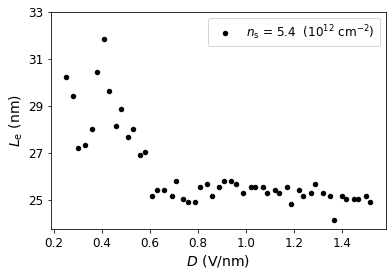

In [78]:
# Mean free path from weak localization
e_len_high_ns_dis_WL = []
for BG in BG_arr_dis_high_ns:
    data_para = data_dis_high_ns[data_dis_high_ns['V_BG'].values==BG]
    B, delta_sigma_B_norm = para_func(data_para, BG)
    B_peak = abs(B[coverage_loc_func(delta_sigma_B_norm, num_filter)])
    e_len_high_ns_dis_WL.append(e_len_WL(B_peak))

plt.scatter(D_high_ns, e_len_high_ns_dis_WL, s=20, color='k', label=r'$n_\mathrm{s}$'+' = 5.4 '+r'$\ (\mathrm{10^{12}\ cm^{-2}})$')
plt.xlabel(r'$D_\mathrm{}$'+' (V/nm)', fontsize=14)
plt.ylabel(r'$L_\mathrm{e}\ (\mathrm{nm})$', fontsize=14)
plt.yticks(np.arange(25,35,2))
plt.legend(fontsize=12, loc='upper right')
plt.show()

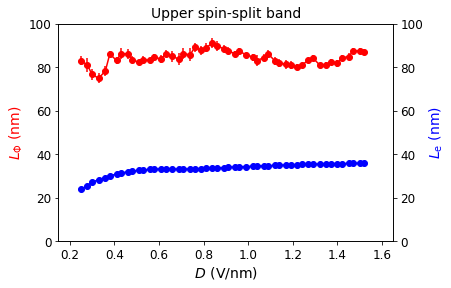

In [51]:
# Plot phase coherence & mean free path with fixed carrier density ~ 5.4e12 cm-2

result_arr, tau_phis, tau_phis_std, tau_es, tau_es_std = fit_WL(data_dis_high_ns, BG_arr_dis_high_ns, e_len_arr_dis_high_ns)
ns_arr_const_high = [ns_const_high/1e4]*len(BG_arr_dis_high_ns)
coh_len, coh_len_error = coh_len_func(tau_phis, tau_phis_std, tau_es, ns_arr_const_high)

fig, ax = plt.subplots(figsize=(6,4))
ax.errorbar(D_high_ns, coh_len, yerr=coh_len_error, color="red", marker="o")
ax.set_xlabel(r'$D_\mathrm{}$'+' (V/nm)', fontsize=14)
ax.set_ylabel(r'$L_\mathrm{Φ}\ (\mathrm{nm})$', color = "red", fontsize=14)
ax.set_title('Upper spin-split band', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim([0.15,1.65])
ax.set_yticks(np.arange(0,101,20))
ax2=ax.twinx()
ax2.plot(D_high_ns, e_len_arr_dis_high_ns, color="blue", marker="o")
ax2.set_ylabel(r'$L_\mathrm{e}\ (\mathrm{nm})$', color="blue", fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_yticks(np.arange(0,101,20))
plt.show()

# Population of the 2nd Spin-Split Band in the First Layer

In [52]:
# Calculate carrier density
BG = -5.1
TG = 11.5
d_t = 19.5e-9
d_b = 13e-9
epsilon = 3.3
C_TG = epsilon_0*epsilon/d_t
C_BG = epsilon_0*epsilon/d_b
ns_2nd_band = round((C_TG*TG+C_BG*BG)/e/1e16,2)
print('Carrier density for the population of upper spin-split band in first layer: '+str(ns_2nd_band)+'e10^12 cm-2')

Carrier density for the population of upper spin-split band in first layer: 3.6e10^12 cm-2


# Digamma Function

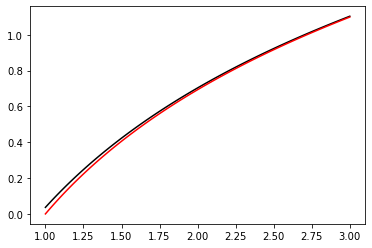

In [26]:
# Generate Digamma function
z = np.linspace(1,3.0,100)
psi(z)

import matplotlib.pyplot as plt
plt.plot(z, psi(1/2+z), color = 'k', label = 'Digamma')
plt.plot(z, np.log(z), color = 'r', label = 'Log')